<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter2_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 지도 학습
***지도 학습(Supervised Learning)*** 이란?

입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용하는 머신러닝 방법<br>

입력/출력 샘플 데이터, 즉 훈련 세트로부터 머신러닝 모델을 만듦.

***Goal***<br>
이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측


## 2.1 분류와 회귀
**분류(classification)** : 미리 정의된, 가능성 있는 여러 클래스 레이블(class label) 중 하나를 예측하는 것<br>

|분류 종류|설명|예시|
|------|---|---|
|이진 분류(binary classification)|질문의 답이 예/아니오만 나오는 경우|이메일에서 스팸을 분류하는 것|
|다중 분류(multiclass classification)|질문의 답이 3개 이상이 나오는 경우|붓꽃의 품종 분류|

**NOTE_이진 분류**
* 양성(positive) 클래스 : 학습하고자 하는 대상<br>
* 음성(nagative) 클래스 <-> 양성 클래스<br>

ex) 스팸 메일 분류<br>
* 스팸 메일 : 양성 클래스<br>
* 스팸이 아닌 메일 : 음성 클래스<br>

**회귀(regression)** : 부동소수점수(실수)를 예측하는 것<br>

ex) 
* 어떤 사람의 교육 수준, 나이 주거지를 통해 연간 소득을 예측하는 경우 
* 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등을 통한 올해 수확량을 예측하는 경우<br>


**회귀와 분류 문제를 구분하는 방법 : 출력 값의 연속성의 유무를 통해 구분**

## 2.2 일반화, 과대적합, 과소적합
**일반화** : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있는 경우<br>
**&rarr;** 훈련 세트에서 테스트 세트로 일반화되었다라고 말함<br>

**과대적합(overfitting)** : 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것<br>
**&rarr;** 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어남.<br>

**과소적합(underfitting)** : 너무 간단한 모델이 선택되는 것<br>
**&rarr;** 데이터의 면면과 다양성을 잡아내지 못하며 훈련 세트, 테스트 세트에 잘맞지 않음<br>

### ***Goal***
일반화 성능이 최대가 되는 최적점에 있는 모델<br>

<img src="https://tensorflowkorea.files.wordpress.com/2017/06/fig2-01.png?w=640">


### 2.2.1 모델 복잡도와 데이터셋 크기의 관계
#### 모델 복잡도 : 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊음
데이터셋에 데이터 포인트가 많음 &rarr; 다양성&uarr;<br>

***But,*** 비슷한 데이터를 모으는 것은 도움X

**다양한 데이터 포인트&uarr; &rarr; 과대적합 없이 더 복잡한 모델을 만듦**<br>

## 2.3 지도 학습 알고리즘

*   데이터를 이용한 학습 & 예측
*   모델의 복잡도의 역할 & 알고리즘을 통한 모델 생성
* 모델들의 장단점 평가
* 매개변수와 옵션의 의미 설명


In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=25489552f8376843179d07e1c1f4e67eae0afee54267ff93055ddeaa1edc79a6
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋
forge 데이터셋 : 두 개의 특성을 가진 데이터셋(이진 분류 데이터셋)<br>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


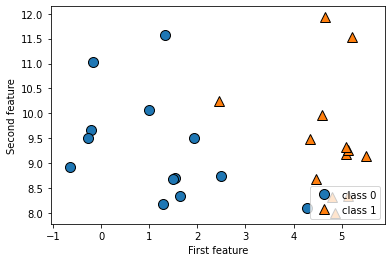

In [ ]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 1], X[:, 0], y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

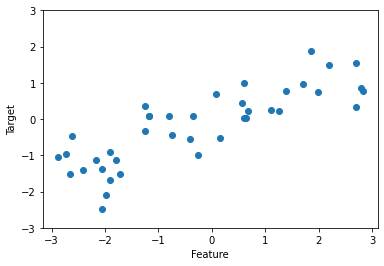

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

**저차원 데이터셋** : 특성이 적은 데이터셋<br>
**고차원 데이터셋** : 특성이 많은 데이터셋<br>

저차원 데이터셋 &rarr; 고차원 데이터셋 : 직관이 유지되지 않을 수 있음.

***저차원 데이터셋을 사용하는 것이 좋음***


In [ ]:
# 유방암 종양의 임상 데이터 불러오기(classification)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# 데이터 포인트:569개 / 특성:30개
print("Cancer data shape:",cancer.data.shape)

Cancer data shape: (569, 30)


In [ ]:
# 악성:212개 / 양성: 357개
print("Class sample count:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Class sample count:
 {'malignant': 212, 'benign': 357}


In [ ]:
print("Feature name:\n", cancer.feature_names)

Feature name:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# 보스턴 주택가격 데이터셋(regression)
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

***특성 공학(feature engineering)*** 이란?<br>
  
개별 특성을 곱해 새로운 특성을 만드는 것

In [ ]:
# 13개 특성 중 2개씩 짝지어 만든 91(=13*12/2)개 특성 + 13개 특성
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃

k-NN 알고리즘 : 가장 간단한 머신러닝 알고리즘



#### k-최근접 이웃 분류
가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


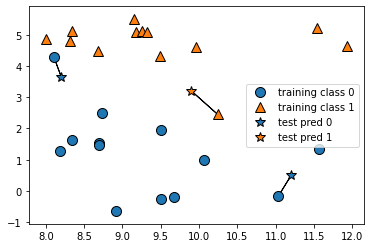

In [ ]:
# test pred와 가까운 training class 1개 선택 (이웃 = 1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


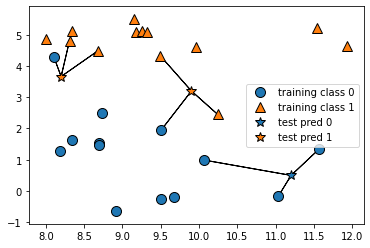

In [ ]:
# test pred와 가까운 training class 3개 선택 (이웃 = 3)
mglearn.plots.plot_knn_classification(n_neighbors = 3)

***이웃의 개수에 따라 test pred의 색이 달라짐***

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# KNeighborsClassifier import
from sklearn.neighbors import KNeighborsClassifier

# 객체 생성
# 이웃의 수 = 3
clf = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# 분류 모델 학습 : 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predict method : 테스트 데이터에 대한 예측
print("Test predict:", clf.predict(X_test))

Test predict: [1 0 1 0 1 0 0]


In [ ]:
# score method : 모델의 일반화 평가
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


#### **KNeighborsClassifier 분석**
주어지 데이터 : 2차원 데이터셋<br>
1. xy 평면에 그림
2. 각 데이터 포인트가 속한 클래스에 따라 평면에 색칠

**&rarr; 결정 경계(dicision boundary)** 관찰 가능<br>
* 2차원 데이터이면 클래스 0과 클래스 1로 지정된 영역

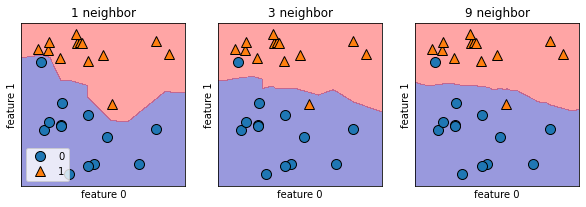

In [ ]:
fig,axes = plt.subplots(1, 3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
  # fit method : self object return
  # 객체 생성 & fit method 한 줄에 작성이 가능
  clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
  ax.set_title("{} neighbor".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)
plt.show()

이웃의 수 &uarr; **&rarr;** 경계가 부드러워짐 **&rarr;** 단순한 모델

***Result***

*이웃의 수 &darr; &rarr; 복잡도 &uarr;*<br>
*이웃의 수 &uarr; &rarr; 복잡도 &darr;*

**if)** 이웃의 수 = 훈련 데이터 전체 개수
* 테스트 포인트가 같은 이웃(모든 훈련 데이터)을 가짐<br>
* 테스트 포인트에 대한 예측은 모두 같은 값

**&rarr;** 훈련 세트에서 가장 많은 데이터 포인트르 가진 클래스가 예측값

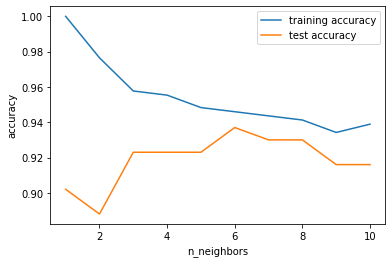

In [ ]:
# 복잡도와 일반화 사이의 관계 입증
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

**n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도에 대한 분석**
* 최근접 이웃의 수 = 1, 훈련데이터에 대한 예측이 완벽( = 1)
* 이웃의 수 &uarr; **&rarr;** 모델의 단순화 **&rarr;** 훈련 데이터의 정확도 &darr;<br>

**&rarr;** 1-최근접 이웃이 모델을 너무 복잡하게 만드는 것을 증명 

**최적인 경우 = n_neighbors 이 6인 경우**

#### **k-최근접 이웃 회귀**


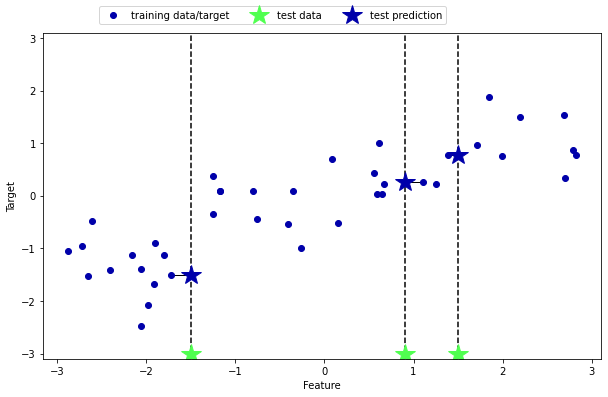

In [ ]:
# wave dataset을 이용
# 이웃이 1인 경우
mglearn.plots.plot_knn_regression(n_neighbors = 1)

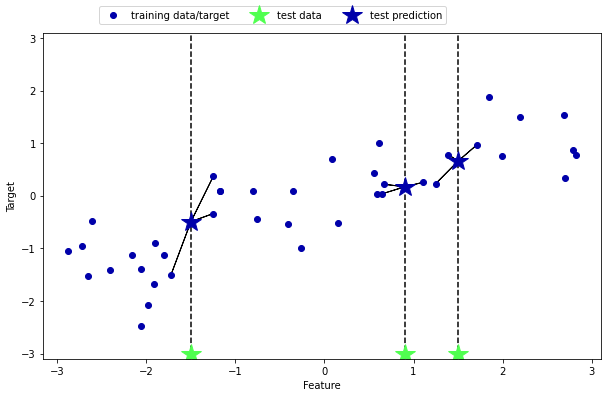

In [ ]:
# 최근접 이웃이 여러 개인 경우 --> 이웃 가닁 평균이 예측
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg = KNeighborsRegressor(n_neighbors = 3)
#훈련 데이터와 타깃을 사용하여 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 테스트 예측
print("Test set predict:\n", reg.predict(X_test))

Test set predict:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


**score method : 회귀일 때  R^2 값을 반환**

***R^2값 이란?***<br>
* 결정 계수라고 하며 예측의 적합도를 측정한 것
* 보통 0 ~ 1 사이의 값

1. R^2 = 1 : 예측이 완벽한 경우<br>
2. R^2 = 0 : 훈련 세트의 출력값의 평균으로만 예측하는 모델<br>
3. R^2 < 0 : 예측과 타깃이 상반된 경향을 가지는 경우

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### **KNeighborsRegressor 분석**

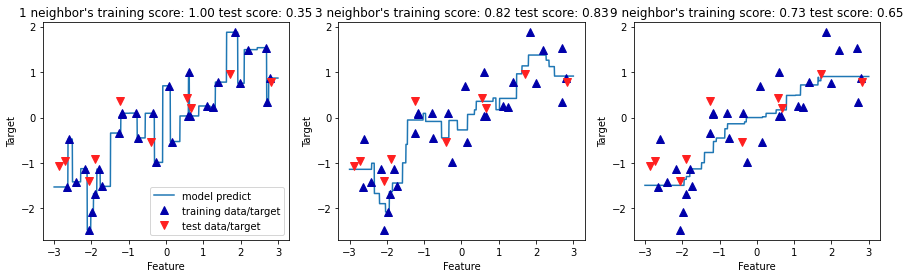

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
  ax.plot(X_test, y_test,'v',c = mglearn.cm2(1), markersize = 8)

  ax.set_title(
      "{} neighbor's training score: {:.2f} test score: {:.2f}".format(
          n_neighbors, reg.score(X_train, y_train),
          reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(["model predict", "training data/target", "test data/target"], loc = "best")
plt.show()

neighbor = 1 : 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 큼<br>

&rarr; 에측값이 훈련 데이터 포인트를 모두 지나감.

***이웃이 많을수록 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 됨.***

#### **장단점과 매개변수**
**KNeighbors 분류기에 중요한 매개변수 : 거리를 재는 방법, 이웃의 수**
1. 거리를 재는 방법 : 유클리디안 거리 방식
2. 이웃의 수 : 보통 3 ~ 5 개

**장점**
1. 이해하기 매우 쉬운 모델
2. 많이 조정하지 않아도 좋은 성능 발휘
3. 더 복잡한 알고리즘을 적용하기전 시도해볼 수 있음
4. 빠르게 만들 수 있음

**단점**
1. 훈련 세트가 크면 예측이 느려짐
2. 전처리하는 과정이 중요
3. 많은 특성을 가진 데이터셋에는 잘 작동하지 않음
4. 특성 값이 대부분 0인 데이터셋과는 잘 작동하지 않음

### 2.3.3 선형 모델
***선형 모델*** 이란?
입력 특성에 대한 **선형 함수**를 만들어 예측을 수행




####**회귀의 선형 모델**

case. 회귀)<br>
***ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b***

* x[0],x[1], . . . ,x[p] : 데이터 포인트에 대한 특성(특성의 개수 : p + 1)<br>
* w, b : 파라미터<br>
* ŷ : 모델이 만들어낸 예측값<br>

ex)
  feature = 1 &rarr; ŷ = w[0] * x[0] + b

feature &uarr; &rarr; w는 각 feature에 해당하는 기울기를 모두 가짐


예측값 = (입력 특성) * (w의 각 가중치 : 음수도 가능) 의 합

w[0]: 0.393906  b: -0.031804


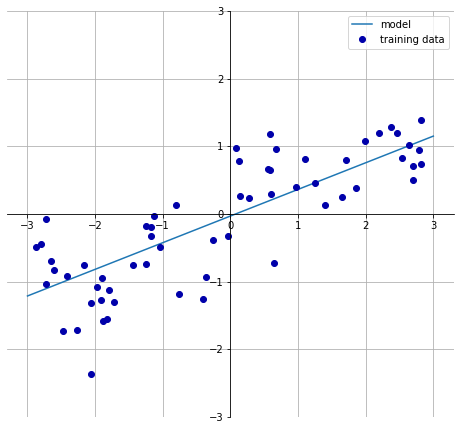

In [ ]:
mglearn.plots.plot_linear_regression_wave()

**선형 회귀가 유용한 경우**<br>

특성이 많은 데이터셋 & 훈련 데이터보다 특성이 더 많은 경우

#### **선형 회귀(최소제곱법)**
* 가장 간단하고 오래된 회귀용 선형 알고리즘
*예측과 훈련 세트에 있는 타깃 y사이의 **평균제곱오차**를 최소화하는 파라미터 w와 b를 찾는 방식

***평균제곱오차*** 란?<br>
예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것

**장점**<br>
매개변수가 없음<br>

**단점**<br>
모델의 복잡도 제어할 방법X


In [ ]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [ ]:
# 기울기 파라미터(w) : 가중치(weight) or 계수(coefficient) --> lr 객체의 coef_ 속성에 저장 (NumPy array)
# 파라미터(b) : 편향(offset) or 절편(intercept) --> intercept_ 속성에 저장 (float)

print("lr.coef_:", lr.coef_)
print("lf.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lf.intercept_: -0.031804343026759746


In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Train set score과 Test set score 비슷 : 과소적합인 상태<br>
* R^2 값이 크지 않음
* 훈련 세트와 테스트 세트의 점수가 매우 비슷<br>


특성이 작은 경우 : 모델이 단순하므로 과대적합이 될 가능성이 적음<br>
고차원 데이터셋(특성이 많은 경우) : 선형 모델의 성능이 매우 높아져 과대적합될 가능성이 높음 

In [ ]:
# sample : 506개, feature : 104개
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


훈련 세트에서는 예측이 정확하지만 테스트 세트에서는 R^2 값이 매우 낮음<br>
**&rarr;** 모델이 과대적합 **&rarr;** 복잡도를 제어할 수 있는 모델을 사용해야함<br>
***&rarr; 리지 회귀를 사용***

#### **리지 회귀**
회귀를 이용한 선형 모델이므로 예측 함수를 사용<br>

가중치(w)선택 = 훈련 데이터를 잘 예측(최소적합법과 동일) + **추가 제약 조건을 만족**

***Goal*** > 가중치(w)의 절댓값을 가능한 한 작게 만드는 것, 즉 w의 모든 원소가 0에 가깝게 되는 것 = 모든 특성이 출력에 주는 영향을 최소한으로 만듦.(기울기를 작게 함.)
###### **&rarr; 규제(regularization)** : 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미

리지 회귀에서 사용하는 규제 방식 : **L2 규제**



In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


***Conclusion***

Training set score : LinearRegression > RidgeRegression<br>
Test set score : LinearRegression < RidgeRegression<br>

**선형 회귀(LinearRegression)** : 과대적합(overfitting)<br>
**리지 회귀(RidgeRegression)** : 과대적합이 적어짐(덜 자유로운 모델이기 때문)

모델의 복잡도 **&rarr;** Training set score &darr; **&rarr;** 더 일반화된 모델

***Test set score*** 에 대한 성능이 중요하기 때문에 ***Ridge Model*** 을 선택


**Ridge 모델의 특징**
* 모델을 단순화 & 훈련 세트에 대한 성능 사이르 절충할 수 있는 방법을 제공<br>
* ***alpha*** 매개변수로 훈련 세트의 성능 대비 모델의 단순화 정도를 지정할 수 있음.

***alpha*** &uarr; **&rarr;** 계수가 0에 가까워짐<br>
**&rarr; result**<br>
1. 훈련 세트의 성능은 나빠짐<br>
2. 모델의 일반화에는 도움이 됨<br>

In [ ]:
# alpha 값이 큰 경우
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
# alpha 값이 작은 경우 --> test set score이 상승(성능이 상승)
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


**alpha** 값에 따른 **coef_(기울기)** 속성의 변화<br>
* **alpha** 값이 크면 더 많은 제약이 있는 모델
* **coef_**의 절댓값 크기가 작을 것 

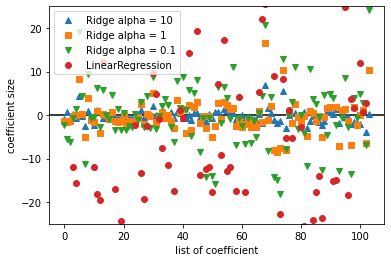

In [ ]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("list of coefficient")
plt.ylabel("coefficient size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()

**그래프에 대한 분석**
* x = 0 인 경우 : 첫 번째 특성에 연관된 계수
* x = 1 인 경우 : 두 번째 특성에 연관된 계수
* y 축: 각 계수의 수치

***alpha 값에 따른 계수의 크기***<br>
1. alpha = 10 &rarr; -3 ~ 3<br>
2. alpha = 1 &rarr; alpha = 10일 때의 계수의 크기보다 큼<br>
3. alpha = 0.1 &rarr; alpha = 1일 때의 계수의 크기보다 큼<br>
4. 규제가 없는 LinearRegression(alpha = 0) : alpha > 0 일 때 보다 큼

**규제의 효과**
1. alpha 값에 따른 계수의 크기를 비교하는 방법
2. alpha 값을 고정하고 훈련 데이터의 크기를 변화시키는 방법

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

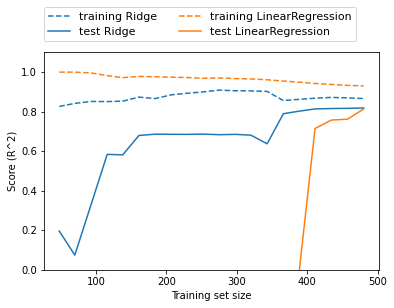

In [ ]:
# 규제의 효과 2번 방법
mglearn.plots.plot_ridge_n_samples()

**그래프 분석**

|목록|선형 회귀|리지|
|----|---------|----|
|점수 비교|훈련 세트 점수 > 테스트 세트 점수|훈련 세트 점수 > 테스트 세트 점수|
|데이테 개수 400미만|학습이 이루어지지 않음|학습이 이루어지고 있음|
|데이터 개수 400이상|학습이 이루어짐|학습이 이루어짐|
|규제 유무|규제 없음|규제 있음|
|규제에 따른 훈련 세트 점수 비교|항상  더 큼|항상 더 작음|
<br>

1. 데이터의 개수가 많아질수록 성능은 좋아짐

2. 데이터의 양이 많아지면 규제 항의 중요성이 낮아져 하지 회귀와 선형 회귀의 성능이 같아질 것

3. 선형 회귀의 훈련 데이터 성능이 낮아짐 &rarr; 데이터의 양이 많아지면 모델이 데이터를 기억하기 어려움 & 과대적합하기 어려움


#### **라소**
* Ridge의 대안으로 선형 회귀에 규제를 적용하는데 이용
* 계수를 0에 가깝게 만들려고 함 &rarr; L1 규제
* 실제로 어떤 계수는 0이 됨 &rarr; 완전히 제외되는 특성이 생김 = **특성 선택(feature selection)**이 자동으로 이루어짐

**&rarr;** 일부 계수가 0으로 만들어지기 때문에 모델을 이해하기 쉬워지며 모델의 가장 중요한 특성이 무엇인지 분명하게 알 수 있음.


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:",np.sum(lasso.coef_!=0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


**Result**
* 과소적합 **&rarr;** alpha 값을 증가<br>
단, max_iter (= 반복 실행하는 최대 횟수)를 늘려야함<br> 
* 4개의 특성만 사용
* alpha 매개변수 지원( 기본값 = 1.0)

In [ ]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha = 0.01, max_iter = 50000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:", np.sum(lasso001.coef_!=0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


**Result**<br>
alpha 값 &darr; **&rarr;** 훈련 세트 & 테스트 세트 성능 &uarr;
* 사용된 특성 개수 : 33개 &rarr; 분석하기가 쉬움
* Ridge 성능보다 좋음

In [ ]:
# 과대적합된 경우(alpha 값이 너무 작음)
lasso00001 = Lasso(alpha = 0.0001, max_iter = 50000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used:", np.sum(lasso001.coef_!=0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


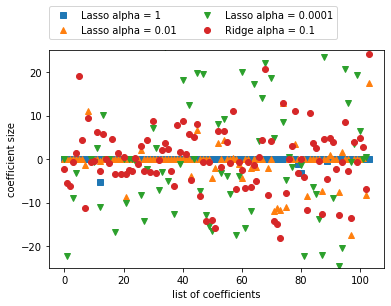

In [ ]:
plt.plot(lasso.coef_, 's',label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25,25)
plt.xlabel("list of coefficients")
plt.ylabel("coefficient size")
plt.show()

**그래프 분석**
* alpha = 1 : 계수 대부분이 0 + 나머지 계수들도 크기가 작음
* alpha = 0.01 : 대부분의 특성이 0
* alpha = 0.0001 : 계수의 대부분이 0이 아니며 값이 큼(규제가 크지 않는 모델)
* Ridge 모델과 alpha = 0.01인 모델과 비슷하지만 어떠한 계수도 0이 되지는 않음.

**리지 vs 라소**
* 리지 회귀를 선호함
* 특성이 많고 그 중 일부분만 중요한 경우에는 라소(Lasso)가 더 좋은 선택일 수 있음
* 분석하기 쉬운 모델을 선호 &rarr; Lasso

**&rarr;** ElasticNet = Lasso + Ridge의 페널티<br>
* 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야함 


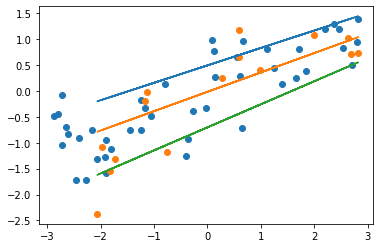

In [ ]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

pred_up = QuantileRegressor(quantile = 0.9, alpha = 0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile = 0.5, alpha = 0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile= 0.1, alpha = 0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, label = 'Test data')
plt.plot(X_test, pred_up, label = 'Quantile:0.9')
plt.plot(X_test, pred_med, label = 'Quantile:0.5')
plt.plot(X_test, pred_low, label = 'Quantile:0.1')
plt.show()

**그래프 분석**<br>
* 백분위 이용
* 라소 모델과 비슷하게 alpha 매개변수로 L1 규제를 조정<br>
* alpha 매개변수 기본값 = 1.0<br>
* alpha 값 &uarr; **&rarr;** 규제가 강해져 과소적합한 모델을 만듦

#### **분류용 선형 모델**
* 이진 분류인 경우<br>
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0<br>

|0과 비교|클래스|
|-------|------|
|예측값 > 0|<center>+1</center>|
|예측값 < 0|<center>-1</center>|

case 1) 회귀용 선형 모델<br>
> 출력 ŷ이 특성의 선형 함수(직선, 평면, 초평면)<br>

case 2) 분류용 선형 모델<br>
> **결정 경계**가 입력의 선형 함수 = (이진) 선형 분류기는 선, 평면, 초평면을
사용해 두개의 클래스를 구분하는 분류기<br>

**선형 모델 학습 알고리즘**<br>
1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지<br>

> 잘못된 분류의 수를 줄이기 위해 w와 b를 조정하는 것은 불가능<br>
> **손실 함수**에 대한 차이는 중요X

##### 선형 분류 알고리즘
**1. 로지스틱 회귀(logistic regression)<br>**
**2. 서포트 벡터 머신(support vector machine)<br>**


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


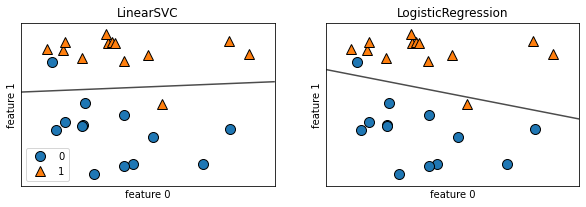

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(max_iter = 5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,ax = ax, alpha = .7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend()
plt.show()

LinearSVC & Logistic Regression 모두 L2 규제(제곱을 패널티로 적용)를 사용<br>

규제 강도 결정 : 매개변수 C<br>

C &uarr; **&rarr;** 규제 &darr; **&rarr;** 데이터 포인트 중 다수에 맞추려고 함.<br>
C &darr; **&rarr;** 계수 벡터(w)가 0에 가까워짐. **&rarr;** 개개의 데이터 포인트를 정확히 분류<br>

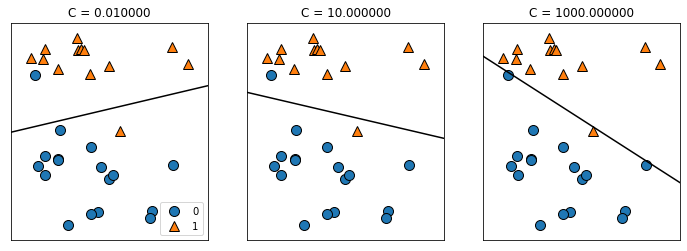

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

 **그래프 분석**
1. C = 0.01(규제가 강함)<br> 
비교적 수평에 가까운 결정 경계<br>
잘못 분류된 데이터 포인트 : 2개<br>

2. C = 10.0<br>
C = 0.01의 결정 경계 기울기와 달라짐.
3. C = 1000(규제가 약함)<br>
잘못 분류된 데이터 포인트 : 1개<br>
클래스의 전체적인 배치를 파악하지 못함. **&rarr; 과대적합**

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# C = 1인 경우 --> 과소 적합(train set score과 test set score이 비슷)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [ ]:
logreg100 = LogisticRegression(C = 100, max_iter = 5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [ ]:
logreg001 = LogisticRegression(C = 0.01, max_iter = 5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


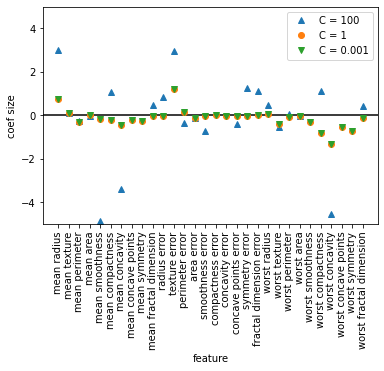

In [ ]:
plt.plot(logreg100.coef_.T, '^',label = "C = 100")
plt.plot(logreg.coef_.T, 'o',label = "C = 1")
plt.plot(logreg.coef_.T, ' v', label = "C = 0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend()
plt.show()

**그래프 분석**
* 규제&uarr; **&rarr;** 계수가 0에 가까움<br>
* C = 100, C = 1 &rarr; 음수<br>
* C  = 0.001 &rarr; 양수<br>
 **&rarr;** 계수가 클래스와 특성의 연관성을 알 수 있음.<br>

 ex) 계수와 클래스의 연관성 
 * "texture error" : 양수 &rarr; 악성과 관련이 있음<br>
 * "mean perimeter" : 계수의 부호가 변화함 &rarr; 양성 or 음성의 신호 모두가 될 수 있음<br>

Training Accuracy of Logistic Regression with C = 0.001: 0.91
Test Accuracy of Logistic Regression with C = 0.001: 0.92
Training Accuracy of Logistic Regression with C = 1.000: 0.96
Test Accuracy of Logistic Regression with C = 1.000: 0.96
Training Accuracy of Logistic Regression with C = 100.000: 0.99
Test Accuracy of Logistic Regression with C = 100.000: 0.98


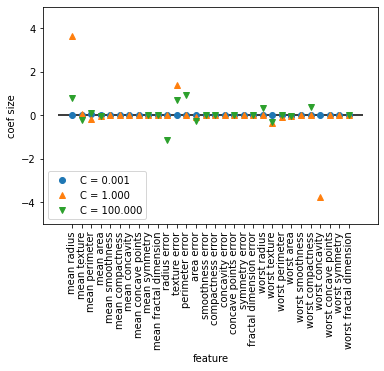

In [ ]:
# L1 규제를 사용
for C, marker in zip([0.001, 1, 100],['o','^','v']):
  lr_l1 = LogisticRegression(solver = 'liblinear', C = C, penalty = 'l1', max_iter = 1000).fit(X_train, y_train)
  print("Training Accuracy of Logistic Regression with C = {:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("Test Accuracy of Logistic Regression with C = {:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5,5)
plt.legend(loc = 3)

#### **다중 클래스 분류용 선형 모델**
(로지스틱 회귀를 제외하고) 많은 선형 모델은 태생적으로 이진 분류만 지원<br>
&rarr; 다중 클래스(multiclass)

**해결책**<br>

***일대다(one-vs.-rest)*** : 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습 **&rarr;** 클래스의 수만큼 이진 분류 모델이 만들어짐<br>

모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택<br>

w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b 의 값이 높은 클래스가 해당 데이터의 클래스 레이블로 할당


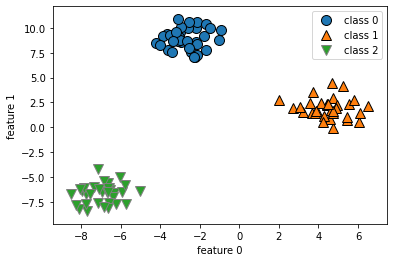

In [ ]:
# dataset : 2차원
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1","class 2"])
plt.show()

In [ ]:
linear_svm = LinearSVC().fit(X, y)
print("size of coefficient array: ", linear_svm.coef_.shape)
print("size of intercept array: ", linear_svm.intercept_.shape)

size of coefficient array:  (3, 2)
size of intercept array:  (3,)


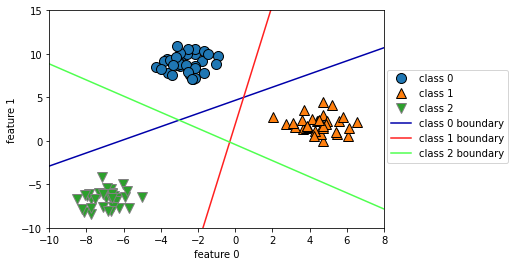

In [ ]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class 0 boundary','class 1 boundary','class 2 boundary'], loc = (1.01, 0.3))
plt.show()

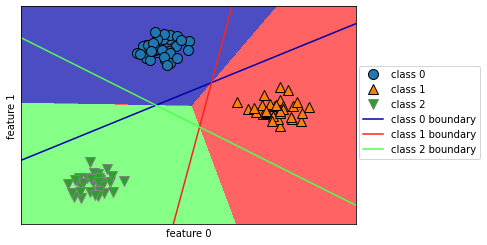

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['class 0','class 1','class 2','class 0 boundary','class 1 boundary','class 2 boundary'],loc = (1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

#### **장단점과 매개변수**<br>

|선형 모델| 매개변수|
|----|----|
|<center>회귀 모델<center>|<center>alpha<center>|
|<center>LinearsSVC<center>|<center>C<center>|
|LogisticRegression|<center>C<center>|

alpha&uarr; **&rarr;** 모델이 단순해짐<br>

C&darr; **&rarr;** 모델이 단순해짐<br>

|규제|특징|
|----|----|
|<center>L1<center>|중요한 특성이 많지 않을 때 사용 & 모델의 해석잉 중요한 요소일 때 사용|
|<center>L2<center>|<center>기본적으로 많이 사용<center>|

***L1의 장점***
* L1은 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기가 쉬움

***선형 모델의 장점***
* 학습 속도가 빠르고 예측도 빠름.
* 매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동 (if. 대용량 데이터셋 &rarr; solver = 'sag' 옵션 or SGDClassifier, SGDPegressor 사용)
* 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 쉽게 이해할 수 있음
* 샘플에 비해 특성이 많을 때 잘 작동 &rarr; 매우 큰 데이터셋에 사용

***선형 모델의 단점***
* 계수의 값들이 왜 그런지 명확하지 않을 때가 있음. (데이터셋의 특성들이 서로 깊게 연관되어 있을 때 발생 &rarr; 계수 분석이 어려움)
* 저차원 데이터셋에는 성능이 좋지 않음





*** 메서드 연결***

모든 scikit-learn의 fit 메서드는 self를 반환함.
```python
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행
logreg = LogisticRegression().fit(X_train, y_train)
```
**메서드 연결(method chaining)** : 메서드 호출을 잇는 것(_init_ or fit)<br>

scikit-lear에서는 fit와 predict를 한 줄에 쓰는 메서드 연결도 자주 사용<br>
```python
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
```

모델의 객체를 만들고, 훈련하고, 예측하는 일을 모두 한 줄에 쓸 수 있음.
```python
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
```


***SGDClassifier & SGDRegressor***


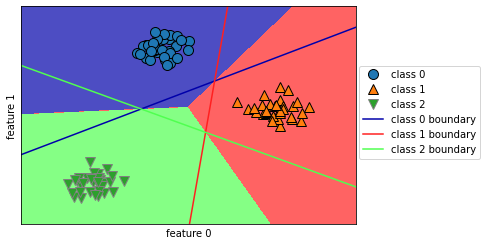

In [ ]:
# SGDClassifier 모델로 훈련
from sklearn.linear_model import SGDClassifier
 
sgd_c = SGDClassifier(alpha = 0.01, learning_rate = 'adaptive', eta0 = 0.1, random_state = 42, n_jobs = -1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['class 0', 'class 1','class 2','class 0 boundary','class 1 boundary','class 2 boundary'], loc = (1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

In [ ]:
# SGDRegressor 모델로 훈련
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

sgd_r = SGDRegressor(learning_rate = 'adaptive', eta0 = 0.1, random_state = 42)
sgd_r.fit(X_train, y_train)

print("Training set score: {:.2f}".format(sgd_r.score(X_train, y_train)))
print("Test set score: {:.2f}".format(sgd_r.score(X_test, y_test)))


Training set score: 0.91
Test set score: 0.77


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### 2.3.4 나이브 베이즈 분류기
* LogisticRegression or LinearSVC 같은 선형 분류기보다 훈련 속도가 빠르지만 일반화 성능은 떨어진다.

* 효과적인 이유 : 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문이다.

|종류|특징|사용|
|----|----|-----|
|<center>GaussianNB<center>|<center>연속적인 데이터<cetner>||
|<center>BernoulliNB<center>|<center>이진 데이터<center>|텍스트 분류|
|<center>MultinomialNB<center>|카운트 데이터(ex. 문장 속 단어의 횟수)|텍스트 분류|


In [ ]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [ ]:
counts = {}
for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 특성마다 1이 나타난 횟수를 센다.
  print("y:", y)
  print("label: ", label)
  print("X:",X[y==label])
  counts[label] = X[y == label].sum(axis = 0)
print("feature count: \n", counts)

y: [0 1 0 1]
label:  0
X: [[0 1 0 1]
 [0 0 0 1]]
y: [0 1 0 1]
label:  1
X: [[1 0 1 1]
 [1 0 1 0]]
feature count: 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


***MultinomianlNB와 GaussianNB의 차이점***<br>

* MultinomialNB : 클래스별로 특성의 평균을 계산<br>
* GaussianNB : 클래스별로 각 특성의 분산과 평균을 저장


#### 장단점과 매개변수

MultinomialNB & BernoulliNB 매개변수 : 모델의 복잡도를 조절하는 **alpha** 매개변수 하나를 가지고 있음.<br>
* 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 **alpha** 개수만큼 추가한다.<br> &rarr; 통계 데이터를 완만하게 만들어줌.<br>

**alpha** &uarr; **&rarr;** 완만해짐 **&rarr;** 모델의 복잡도 &darr;

* **alpha**에 따른 알고리즘 성능 변동은 크지않아 성능 향상에 크게 기여X<br>
    &rarr; 조정하면 어느 정도 정확도를 높일 수 있음

GaussianNB :  고차원 데이터셋에 사용<br>
MultinomialNB & BernoulliNB : 희소한 데이터 카운트에 이용<br>
* 성능 차이 : MultinomialNB > BernoulliNB

**특징**<br>
* 선형 모델과 장단점이 비슷
* 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기가 쉽다.
* 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음
* 선형 모델로는 학습 시간이 오래 걸리는 매우 큰 데이터셋이 시도해볼만한 알고리즘

### 2.3.5 결정 트리
**결정 트리(decision tree)** : 분류와 회귀 문제에 사용되며 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습하는 모델<br>


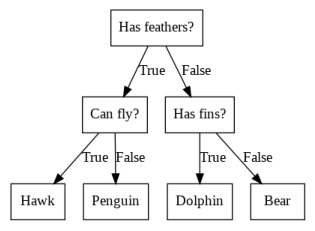

In [ ]:
mglearn.plots.plot_animal_tree()

노드(node) : 질문이나 정답을 담은 네모 상자<br>
**리프(leaf)** : 마지막 노드<br>
에지(edge) : 질문의 답과 다음 질문을 연결<br>

#### 결정 트리 만들기
결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록(=테스트)을 학습한다는 뜻이다.<br>

* 데이터 형태 : 2차원 데이터셋과 같은 연속된 특성으로 구성<br>
* 테스트 형태 : 특성 i는 값 a보다 큰가?

<img src="https://user-images.githubusercontent.com/53929665/99183268-cd147f80-277d-11eb-8165-2ee0be43ce00.PNG">

알고리즘은 가능한 모든 테스트에서 타깃 값에 대해 가장 많은 정보를 가진 것을 고름.<br>



데이터셋이 x[1] = 0.06에서 수평으로 나누는 것이 가장 많은 정보를 포함함.<br>

&rarr; 클래스 0에 속한 포인트와 클래스 1에 속한 포인트를 가장 잘 나누고 있음.

<img src = "https://user-images.githubusercontent.com/53929665/99183175-5081a100-277d-11eb-8d35-674bab6589f3.PNG">

**루트 노드(root node)** : 맨 위 노드로 클래스 0에 속한 포인트 50개와 클래스 1에 속한 포인트 50개를 모두 포함한 전체 데이터 셋을 나타냄.

1. 직선이 의미하는 (x[1] <= 0.06) 분기가 일어남.
2. 왼쪽 노드 (x[1] <= 0.06 인 경우) 에는 클래스 0에 속한 포인트 2개, 클래스 1에 속하는 포인트 32개가 할당
3. 오른쪽 노드 (x[1] > 0.06 인 경우) 에는 클래스 0에 속한 포인트 48개, 클래스 1에 속하는 포인트 18개가 할당

**&rarr;** 완벽하게 분류하지 못함(왼쪽 노드 클래스 0에 속하는 포인트 2개, 오른쪽 노드 클래스 1에 속하는 포인트 18개)

<img src = "https://user-images.githubusercontent.com/53929665/99183177-511a3780-277d-11eb-8503-083ffd211d71.PNG">

x[0] 값을 기준으로 왼쪽과 오른쪽 영역으로 나누고 있다.

데이터를 분할하는 것 : 각 분할된 영역이 (결정 트리의 리프) 한 개의 타깃 값(하나의 클래스나 하나의 회귀 분석 결과)를 가질 때까지 반복

**순수 노드(pure node)** : 타깃 하나로만 이뤄진 리프 노드<br>

<img src = "https://user-images.githubusercontent.com/53929665/99183179-51b2ce00-277d-11eb-9ca0-585063802e89.PNG">

**새로운 데이터 포인트에 대한 예측**<br>

* 주어진 데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지를 확인 &rarr; 그 영역의 타깃 값 중 다수 (순수 노드라면 하나)인 것을 예측 결과로 함.
* 루트 노드에서 시작해 테스트의 결과에 따라 왼쪽 또는 오른쪽으로 트리를 탐색해나가는 식으로 영역을 찾음.
* 회귀 문제에도 트리를 이용할 수 있음.
* 각 노드의 테스트 결과에 따라 트리를 탐색 &rarr; 새로운 데이터 포인트에 해당되는 리프 노드를 찾음. &rarr; 찾은 리프 노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 됨.
 





#### **결정 트리의 복잡도 제어하기**

모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합됨.<br>

***overfitting case***<br>

클래스 0으로 결정된 영역이 클래스 1로 결정된 영역에 둘러쌓인 경우 & 클래스 1로 결정된 영역이 클래스 0으로 결정된 영역에 둘러쌓인 경우 **&rarr; 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상치(outlier)하나에 너무 민감.**<br>

**과대적합을 막는 전략**

1. 사전 가지치기(pre-pruning) : 트리 생성을 일찍 중단하는 전략<br>
  * 트리의 최대 깊이나 리프의 최대 개수를 제한
  * 노드가 분할하기 위한 포인트의 최소 개수를 지정
2. 사후 가지치기(post-pruning) or 가지치기(pruning) : 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략<br>






In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 가지치기를 하지 않은 트리
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Training set accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy : {:.3f}".format(tree.score(X_test, y_test)))

Training set accuracy : 1.000
Test set accuracy : 0.937


리프노드 &rarr; 순수노드 &rarr; 훈련세트의 정확도 : 100%<br>
결정트리의 깊이 제한 X(가지치기하지 않음) &rarr; 복잡 & 과대적합되기 쉬워 새로운 데이터에 일반화 X

In [ ]:
# 가지치기를 한 트리
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Training set accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy : {:.3f}". format(tree.score(X_test, y_test)))

Training set accuracy : 0.988
Test set accuracy : 0.951


결정트리의 깊이 제한(가지치기를 함) &rarr; 복잡도 떨어짐, 과대적합이 줄어듬.

- 훈련세트의 정확도는 낮아짐(가지치기를 하지않는 트리와 비교)
- 테스트세트의 정확도는 높아짐(새로운 데이터에 일반화가 되었다고 할 수 있음.)

#### 결정트리 분석

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["악성", "양성"], feature_names = cancer.feature_names, impurity = False, filled = True)

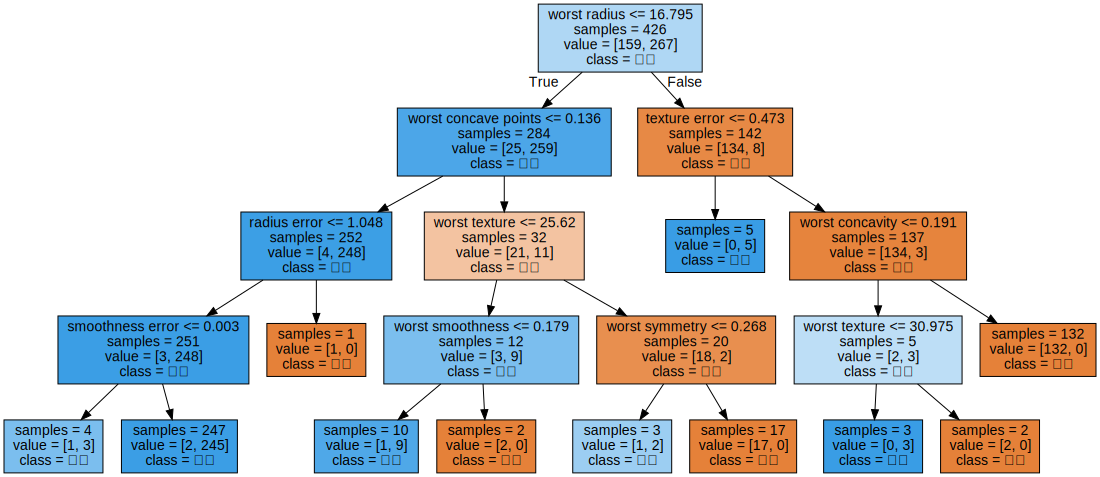

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

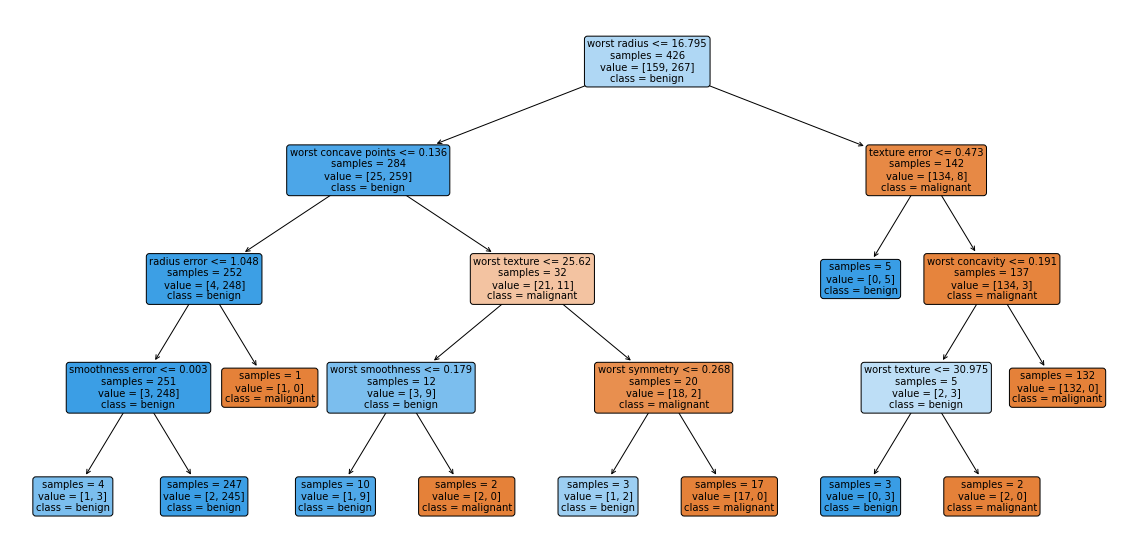

In [ ]:
# scikit-learn 0.21 version .dot 파일을 만들지 않고 트리를 시각화
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(tree, class_names = ["malignant", "benign"], feature_names = cancer.feature_names, impurity = False, filled = True, rounded = True, fontsize = 10)
plt.show()

#### 트리의 특성 중요도

**특성 중요도(feature importance)** : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가

- 0 <= 특성 중요도 <= 1

- 특성 중요도가 0에 가까울수록 사용정도가 작으며, 1에 가까울수록 사용정도가 크다.

- 0은 전혀 사용X, 1은 완벽하게 타깃 클래스를 예측

- 특정중요도의 전체 합은 1이다.


In [ ]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


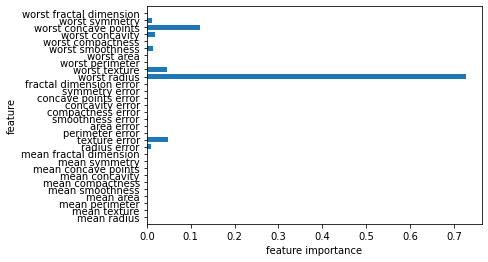

In [ ]:
# 특성 중요도를 시각화
def plot_feature_importance_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1, n_features)

plot_feature_importance_cancer(tree)

**그래프 분석**
- 첫 번째 노드에서 사용한 특성(worst radius)이  가장 중요한 특성으로 나타남

- 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님.

**선형 모델의 계수 vs 결정 트리의 특성 중요도**

- 선형모델의 계수는 음수도 존재하지만, 특성 중요도는 항상 양수이며 어떤 클래스를 지지하는지 알 수 없음.

ex) 특성 중요도의 값은 "worst raidus"가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없음.

Feature importances: [0. 1.]


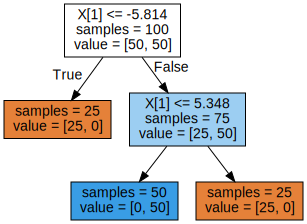

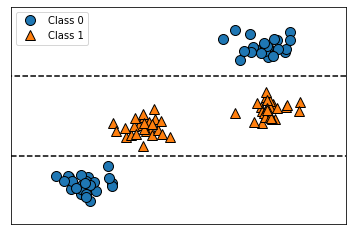

In [ ]:
mglearn.plots.plot_tree_not_monotone()

위의 결정 트리를 통해 특성과 클래스 사이의 관계가 단순하지 않음을 알 수 있다.

***회귀 결정 트리***

- 회귀 결정 트리의 사용법과 분석은 분류 트리와 매우 유사함.

- 회귀를 위한 트리 기반의 모델에는 특별한 속성이 존재

**외삽(extrapolation)** : 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음.

Text(0, 0.5, 'Price($/Mbyte')

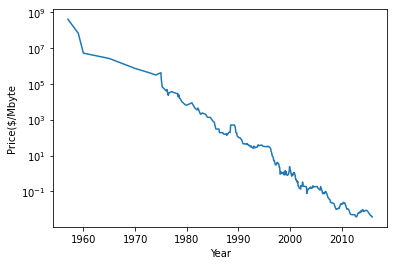

In [ ]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price($/Mbyte")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 저장
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 변환
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

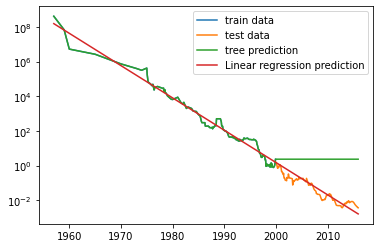

In [ ]:
plt.semilogy(data_train.date, data_train.price, label = "train data")
plt.semilogy(data_test.date, data_test.price, label = "test data")
plt.semilogy(ram_prices.date, price_tree, label = "tree prediction")
plt.semilogy(ram_prices.date, price_lr, label = "Linear regression prediction")
plt.legend()
plt.show()

**그래프 분석**


선형 모델 vs 트리 모델

- 선형 모델은 직선으로 데이터를 근사하여 테스트 데이터(2000년 이후)를 꽤 정확히 예측

- 트리 모델은 훈련 데이터를 완벽하게 예측(트리의 복잡도에 제한 X = 가지치기 X)

- 트리 모델은 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측


***트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음(단점)***

#### 장점과 매개변수

**매개변수**

- 모델 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수가 있다.

- max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는데 충분함.

**장점**

- 모델을 쉽게 시각화

- 데이터의 스케일에 구애를 받지않음

- 특성의 정규화난 표준화 같은 전처리 과정이 필요 X

- 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동

**단점**

- 사전 가지치기를 사용해도 과대적합되는 경향이 있어 일반화 성능이 좋지 않음.

**&rarr; 앙상블 방법을 단일 결정 트리의 대안으로 사용**

### 2.3.6 결정 트리의 앙상블

**앙상블(ensemble)** : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 연결하여 더 강력한 모델을 만드는 기법

그 중 두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증되었으며 이 두가지 모델을 구성하는 기본 요소로 결정 트리를 사용한다.

1) **랜덤포레스트(random foreset)**

2) **그레이티언트 부스팅(gradient boosting)**


#### 랜덤 포레스트

- 랜덤 포레스트는 결정 트리의 주요 단점인 훈련 데이터에 과대적합되는 문제를 회피할 수 있는 방법이다.

- 랜덤 포레스트는 조금씩 다는 여러 결정 트리의 묶음
- 서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.

**구현 방법**

결정 트리를 무작위성을 주입시켜 많이 만든다.

**트리를 랜덤하게 만드는 방법**

1) 데이터 포인트를 무작위로 선택

2) 분할 데이터에서 특성을 무작위로 선택

##### **랜덤 포레스트 구축**

1) 트리의 개수를 정하기(매개변수 : n_estimators)

2) 부트스트랩 샘플(bootstrap sample)을 생성 = n_samplesrodml 데이터 포인트 중에서 무작위로(중복o) 데이터를 n_samples 횟수만큼 반복 추출(독립적으로 만들기 위해 무작위한 선택이 필요)

3) 데이터셋으로 결정 트리를 만들기 : 후보 특성을 무작위호 선택한 후 최선의 테스트를 찾는다.
  몇 개의 특성을 고를지는 max_features 매개변수로 조정, 후보 특성은 트리를 만들 때마다 새로 뽑음.

4) 예측을 할 때는 알고리즘이 모델이 있는 모든 트리의 예측을 만듦.
  
  - 회귀의 경우, 예측들을 평균하여 최종 예측을 만듦.

  - 분류의 경우, 약한 투표 전략을 사용

  &rarr; 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 함.

***max_features***

- 핵심 매개변수

- max_features 값 &uarr; &rarr; 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰짐.

- max_features 값 &darr; &rarr; 랜텀 포레스트의 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 갚어짐.



##### **랜텀 포레스트 분석**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

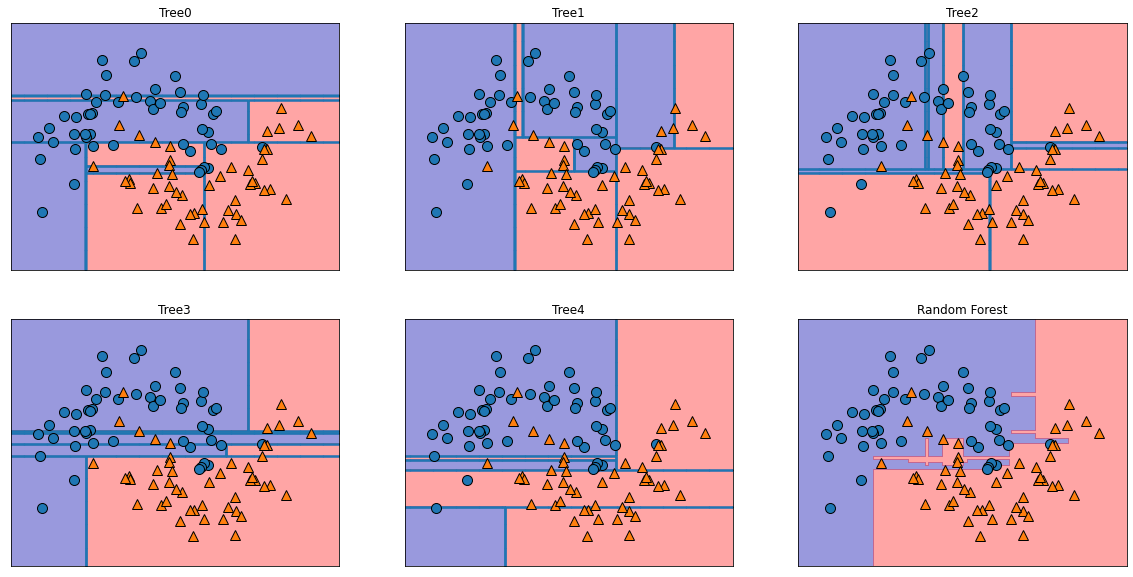

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

**그래프 분석**

- 다섯 개의 트리가 만든 결정 경계가 모두 다름

- 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리가 불완전함.

***랜덤 포레스트는 개개의 트리보다 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어줌.***

In [ ]:
# 유방암 데이터셋 & 100개의 트리로 만들어진 랜덤 포레스트
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print("Traing set accuracy : {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy : {:.3f}".format(forest.score(X_test, y_test)))


Traing set accuracy : 1.000
Test set accuracy : 0.972


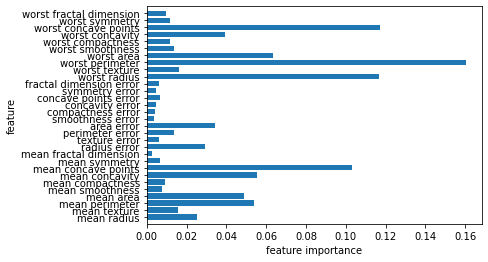

In [ ]:
# 특성 중요도(각 트리의 특성 중요도를 취합한 결과)
plot_feature_importance_cancer(forest)

**그래프 분석**

- 단일 트리의 경우보다 훨씬 많은 특성이 0이상의 중요도 값을 갖고 있음.

- 랜덤 포레스트가 뽑은 가장 중요한 특성 : worst perimeter (단일 트리 : worst radius)

- 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다.

##### 장점과 매개변수

**주의할 점**

- random_state에 따라 전혀 다른 모델이 만들어짐.

- 트리가 많을수록, random_state 값의 변화에 따른 변동이 적음

- 같은 결과를 만들기 위해서는 random_state 값을 고정해야함

**장점**

- 매우 큰 데이터셋에도 잘 작동

- 훈련은 여러 CPU코어롤 간단하게 병렬화

**단점**

- 매우 차원이 높고 희소한 데이터(ex. 텍스트)에는 잘 작동하지 않음 &rarr; 선형모델이 더 적합

- 훈련과 예측이 느림(속도와 메모리 사용에 제약 o &rarr; 선형 모델이 더 적합)

**매개변수**

중요 매개변수 : n_estimators, max_features

옵션 : max_depth같은 사전 가지치기 매개변수, n_jobs(사용할 코어 수을 지정)

- n_estimators가 클수록 좋음 &rarr; 더 많은 트리를 평균하면 과대적합이 줄어 안정적인 모델을 만들 수 있음(단, 메모리와 긴 훈련 시간이 요구됨)

- max_features의 값이 작을수록 과대적합을 줄여줌, 기본적으로 기본값을 씀

  - 분류 : max_features = sqrt(n_features)
  
  - 회귀 : max_features = n_features

- max_features나 max_leaf_nodes 매개변수를 추가하면 성능이 향상 & 메모리와 시간 &darr;

- n_jobs &uarr; &rarr; 훈련 속도가 빨라짐(n_jobs = -1로 지정하면 모든 코어를 사용)

#### 그레이디언트 부스팅 회귀 트리

- 여러 개의 결정 트리를 묶어 강력한 모델을 만듦

- 분류와 회귀에 모두 사용

- 이전 트리의 오차를 보완하는 방식으로 순차적

- 랜덤 포레스트와 달리 무작위성이 없으며 대신 강력한 사전 가지치기를 사용

- 간단한 모델(**약한 학습기 = weak learner**)을 많이 연결 &rarr; 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행(트리가 많을수록 예측 성능이 좋아짐.)

- 랜덤 포레스트에 비해 매개변수 설정에 민감함(잘 조정하면 더 높은 정확도를 제공)

**구축 방법**

- 하나에서 다섯 정도의 깊지 않은 트리를 사용 &rarr; 메모리를 적게 사용 & 예측도 빠름

**중요 매개변수**

1) 사전 가지치기

2) 트리 개수 

  - n_estimators &uarr; &rarr; 모델의 복잡도 &rarr; 훈련 세트에서의 실수를 바로잡을 기회 &uarr;

3) learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어

  - 학습률 &uarr; &rarr; 보정이 강해짐 &rarr; 복잡한 모델을 만듦

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 : 깊이 = 3, 트리 개수 = 100, 학습률 = 0.1
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Training set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy : 1.000
Test set accuracy : 0.965


In [ ]:
# 최대 깊이를 낯추기 : 깊이 = 1
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print("Training set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy : 0.991
Test set accuracy : 0.972


In [ ]:
# 학습률 낮추기 : 학습률 = 0.01
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print("Training set accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training set accuracy : 0.988
Test set accuracy : 0.965


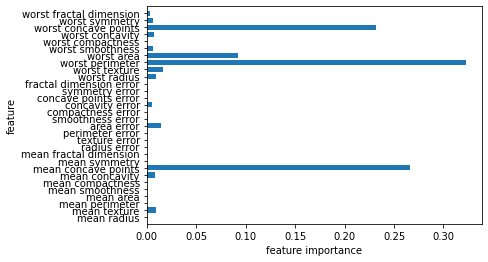

In [ ]:
# 특성 중요도
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

**그래프 분석**

- 랜덤 포레스트와 달리 일부 특성을 강조

- 보통 안정적인 랜덤 포레스트를 사용하지만 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그레이디언트 부스팅을 사용하면 도움이 됨

- 대규모 머신러닝 문제 : xgboost패키지 또는 파이썬 인터페이스를 권장(그레이디언트 부스팅 구현보다 빨랐음 & 튜닝이 쉬움)

##### **장점과 매개변수**

**장점**

- 특성의 스케일을 조정 X

- 이진 특성이나 연속적인 특성에도 잘 작동

**단점**

- 매개변수를 잘 조정해야 함

- 훈련 시간이 길다

- 트리 기반 모델의 특성을 가지고 있어 희소한 고차원 데이터에는 잘 작동하지 않음

**매개변수**

1) n_estimators : 트리의 개수를 지정

  - n_estimators &uarr; &rarr; 모델이 복잡해져 과대적합될 가능성 &uarr;

2) learning_rate : 이진 트리의 오차를 보정하는 정도를 조절

  - learning_rate &darr; &rarr; 더 많은 트리를 추가

일반적으로 가용된 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾음.

3) max_depth(or max_leaf_nodes) : 트리의 복잡도를 낮춤

  - max_depth를 매우 작게 설정 : **max_depth <= 5**


***scikit-learn 0.20 version***

 - n_iter_no_change & validation_fraction : 조기 종료를 위한 매개변수

 - 훈련 데이터에서 validation_fraction(기본값 0.1)비율만큼 검증 데이터로 사용 &rarr; n_iter_no_change 반복 동안 검증 점수가 향상되지 않으면 훈련이 종료(n_iter_no_change 기본값 = None &rarr; 조기 종료 X)

### 2.3.7 그 외 다른 앙상블

1) 배깅(bagging)

2) 에이다부스트(AdaBoost)

3) 엑스트라 트리(Extra-Tree)

4) 히스토그램 기반 그레이디언트 부스팅(Histogram-based Gradient Boosting)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify = ym, random_state = 42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state = 0)

#### 배깅

배깅(Bagging) : Boosting aggregatingdml 줄임말로 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 부트스트랩 샘플을 만드는 것은 랜덤 포레스트의 특징과 동일

- 분류기가 predict_proba() 메서드를 지원하는 경우는 확률값을 평균하여 예측하며 그렇지 않으면 가장 빈도가 높은 클래스 레이블이 예측 결과임.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
# 훈련할 분류기 개수 = 100(기본값 : 10) oob_score = True
bagging = BaggingClassifier(LogisticRegression(solver = 'liblinear'), n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

***oob_score = True***

- 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가

  &rarr; 이 값을 OOB(out of bag)오차라고 함

- oob_score을 통해 테스트 세트의 성능을 짐작할 수 있음.

- RandomForestClassifier도 oob_score 매개변수를 지원(기본값 : False)

In [ ]:
print("Training set accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test set accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB sample accuracy : {:.3f}".format(bagging.oob_score_))

Training set accuracy : 0.962
Test set accuracy : 0.958
OOB sample accuracy : 0.948


랜덤 포래스트를 사용하여 배깅을 수행하는 것이 결정 트리로 수행하는 것보다 더 편리함(아래의 코드에서는 결정 트리로 배깅)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, random_state = 42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

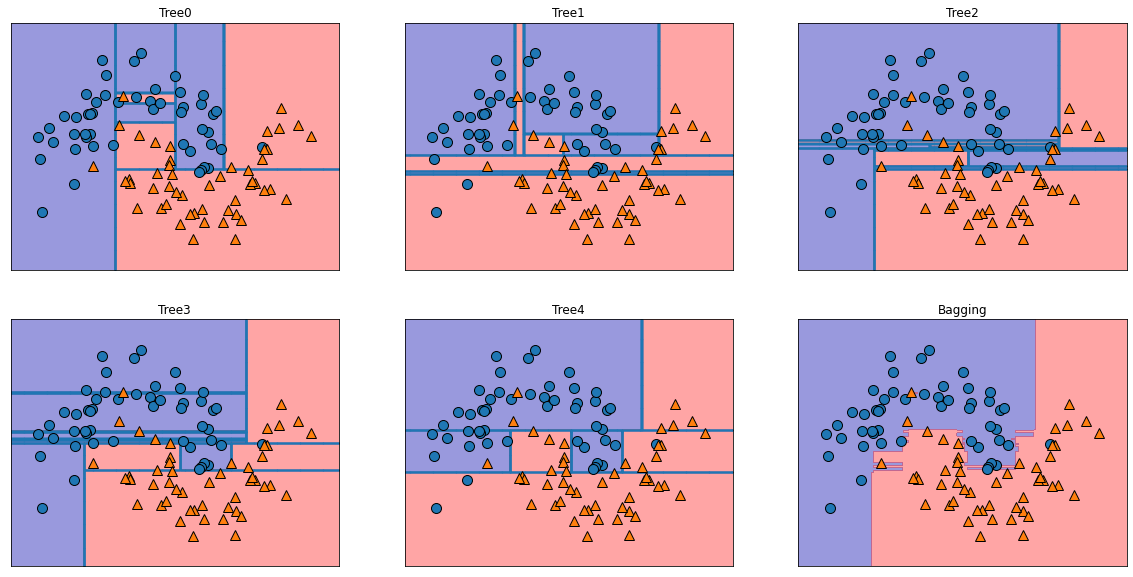

In [ ]:
# 시각화
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [ ]:
# n_estimators = 100
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

print("Training set accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test set accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB sample accuracy : {:.3f}".format(bagging.oob_score_))

Training set accuracy : 1.000
Test set accuracy : 0.965
OOB sample accuracy : 0.948


**매개변수**

1) max_samples
  - 부트스트랩 샘플의 크기를 지정(기본값 : 1.0, 훈련 샘플 개수만큼 추출)

  - 샘플 개수를 지정하거나 훈련 샘플 개수의 비율을 지정

2) booststrap

  - 기본값은 True

  - False로 지정하면 중복을 허용하지 않는 샘플링을 수행

3) max_features
  
  - 각 분류기 훈련에 사용할 특성 개수를 지정

  - 랜덤 포레스트와 달리 가본값은 1.0으로 전체 특성을 사용
  
  - 사용할 특성 개수를 지정하거나 특성의 비율를 지정

4) boost_features
  
  - 기본값은 False

  - True로 지정하면 중복을 허용하여 특성을 선택

#### 엑스트라 트리

**엑스트라 트리(Extra-Tree)**: 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음.

|특징|엑스트라 트리|랜덤 포레스트|
|---|----------|----------|
|<cneter>splitter<center>|<center>random으로 지정<center>|best로 지정|
|bootstrap|기본적으로 사용X(사용가능)|<center>사용함<center>|

무작위성&uarr; &rarr; 편향(bias)&uarr; & 분산(variance)&darr;

**예측 방식** : 각 트리가 만든 확률값을 평균

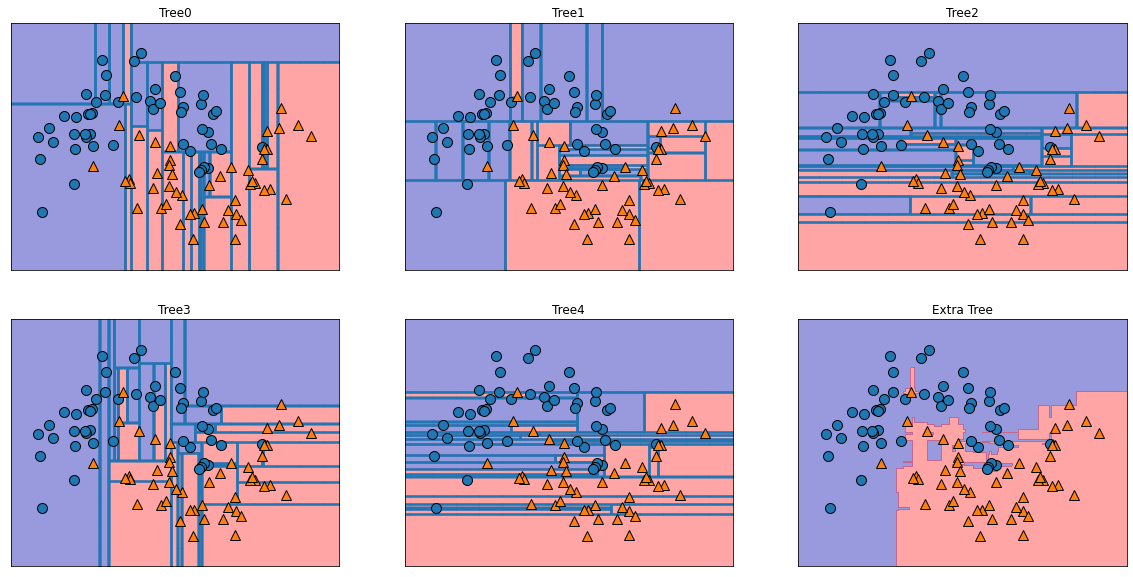

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators = 5, n_jobs = -1, random_state = 0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Extra Tree")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [ ]:
# 트리 개수 = 100
xtree = ExtraTreesClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
xtree.fit(Xc_train, yc_train)

print("Training set accuracy: {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("Test set accuracy: {:.3f}".format(xtree.score(Xc_test, yc_test)))

Training set accuracy: 1.000
Test set accuracy: 0.972


엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야하는 단점이 있다.<br>

이 때문에 랜덤 포레스트를 더 선호한다.

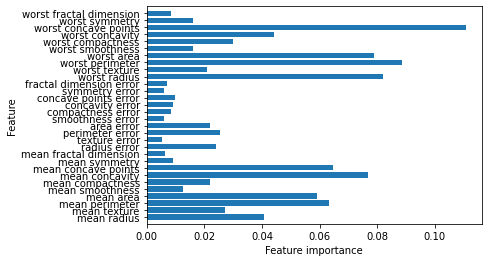

In [ ]:
# 특성 중요도 시각화

n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

#### 에이다부스트

**에이다부스트(AdaBoost)** : Adaptive Boosting의 줄임말로 그레이디언트 부스팅처럼 약한 학습기를 사용한다.

- 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련

- 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택

- 그레이디언트 부스팅과 동일하게 순차적으로 학습

- 기본값으로 max_depth = 3를 사용

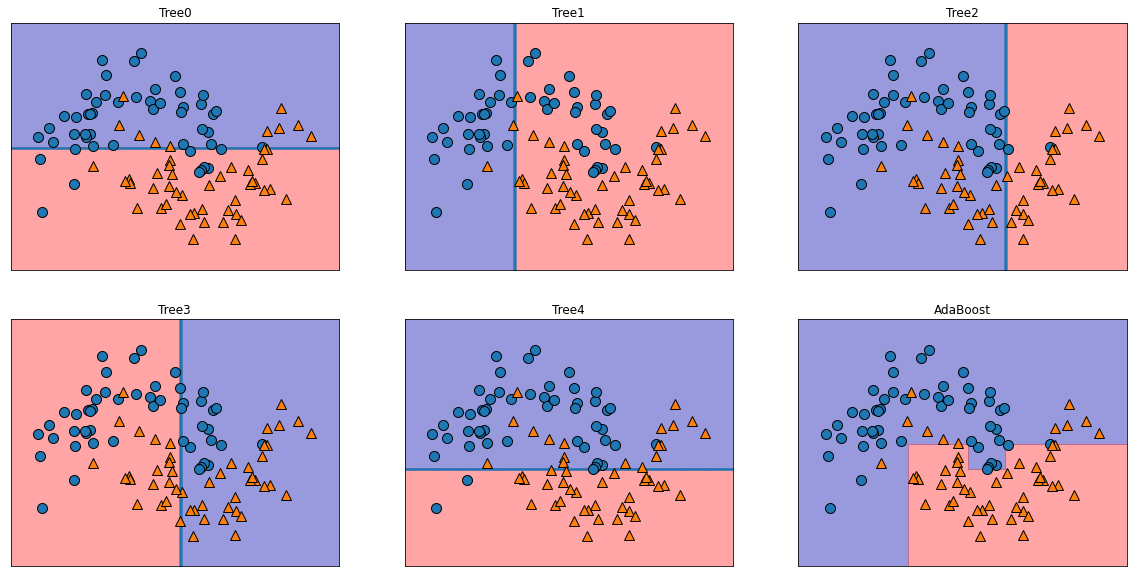

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# max_depth = 1
ada = AdaBoostClassifier(n_estimators = 5, random_state = 42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
  ax.set_title("Tree{}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("AdaBoost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

깊이가 1인 결정 트리를 사용 &rarr; 각 트리의 결정 경계가 직선 하나

In [ ]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ada.fit(Xc_train, yc_train)

print("Training set accuracy: {:.3f}".format(ada.score(Xc_train, yc_train)))
print("Test set accuracy: {:.3f}".format(ada.score(Xc_test, yc_test)))

Training set accuracy: 1.000
Test set accuracy: 0.986


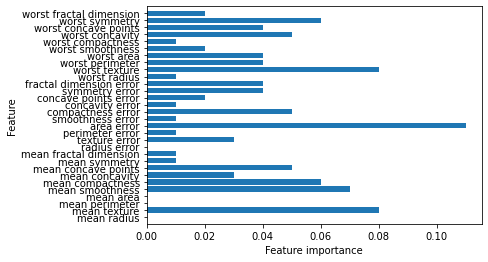

In [ ]:
# 특성 중요도 시각화
plt.barh(range(n_features), ada.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

**그래프 분석**

- 다른 모델에서 부각되지 않았던 'area error'의 특성을 크게 강조하고 있음.

#### 히스토그램 기반 부스팅

- 입력 특성을 256개의 구간으로 나눔 &rarr; 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있음

- 256개의 구간 중 하나가 누락된 값을 위해 사용 &rarr; 누락된 값을 위한 전처리 필요 X

- 샘플 개수가 1만 개 이상인 경우 그레이디언트 부스팅보다 훨씬 빠름

- 기본 매개변수에서도 좋은 성능을 제공

- 부스팅 횟수를 지정하는 max_iter 매개변수(기본값 100)값&uarr; &rarr; 성능&uarr;

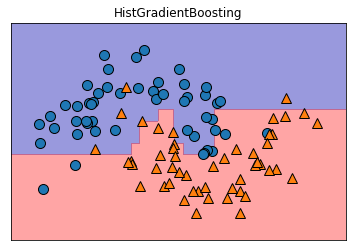

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
hgb.fit(Xm_train, ym_train)

mglearn.plots.plot_2d_separator(hgb, Xm, fill = True, alpha = .4)
plt.title("HistGradientBoosting")
mglearn.discrete_scatter(Xm[:, 0], Xm[:,1], ym)
plt.show()

In [ ]:
hgb = HistGradientBoostingClassifier(random_state = 42)
hgb.fit(Xc_train, yc_train)

print("Training set accracy: {:.3f}".format(hgb.score(Xc_train, yc_train)))
print("Test set accracy: {:.3f}".format(hgb.score(Xc_test, yc_test)))

Training set accracy: 1.000
Test set accracy: 0.979


히스토그램 기반 부스팅은 특성 중요도를 제공하지 않지만 permutation_importance 함수를 사용하여 특성 중요도를 계산할 수 있다.

**permutation_importance 함수** : 특성 값을 차례대로 섞은 후 모델의 성능을 평가하여 어떤 특성이 중요한 역할을 하는지를 계산, 다른 모델에도 사용 가능

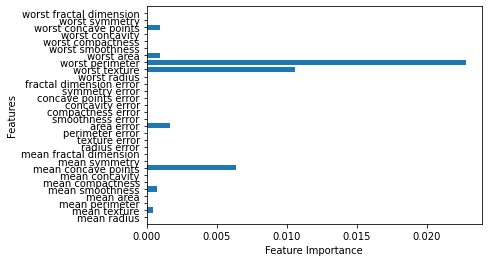

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(hgb, Xc_train, yc_train, n_repeats = 10, random_state = 42, n_jobs = -1)
plt.barh(range(n_features), result.importances_mean, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

**그래프 분석**

- 그레이디언트 부스팅과 비슷하게 일부 특성에 크게 의존

- 'worst perimeter'가 가장 중요한 특성으로 나타남

**트리 기반 앙상블 모델의 매개변수 기본값 비교**

|   |<center>랜덤 포레스트<center>|<center>그레이디언트 부스팅<center>|<center>엑스트라 트리<center>|<center>히스토그램 기반 부스팅<center>|
|---|----------|--------------|---------|-----------------|
|<center>트리 개수<center>|<center>n_estimators = 100<center>|<center>n_estimators = 100<center>|<center>n_estimators = 100<center>|<center>max_iter = 100<center>|
|<center>학습률<center>|<center>없음<center>|<center>learning_rate = 0.1<center>|<center>없음<center>|<center>learning_rate = 0.1<center>|
|<center>노드 분할 기준<center>|<center>분류: criterion = 'gini'<br>회귀: criterion = 'squared_error'<center>|<center>criterion = 'friedman_mse'<center>|<center>분류: criterion = 'gini'<br>회귀: criterion = 'squared_error'<center>|<center>없음<center>|
|<center>손실 함수<center>|<center>없음<center>|<center>분류: loss = 'deviance'(로지스틱 회귀)<br>회귀: loss = 'squared_error'<center>|<center>없음<center>|<center>분류: loss = 'auto'(이진 분류는 'binary_crossentropy',<br> 다중 분류는 'categorical_crossentropy')<br>회귀: loss = 'squared_error'<center>|
|<center>샘플 부트스 트래핑<center>|<center>bootstrap = True<center>|<center>없음<center>|<center>bootstrap = False<center>|<center>없음<center>|
|<center>샘플 개수<center>|<center>max_samples = None(샘플 전체)<center>|<center>subsample = 1.0<center>|<center>max_samples = None(샘플 전체)<center>|<center>없음<center>|
|<center>특성 개수<center>|<center>max_features = 'auto'<br>(분류는 특성 개수의 제곱근, 회귀는 전체 특성)|max_features = None(특성 전체)<center>|<center>max_features = 'auto'<br>(분류는 특성 개수의 제곱근, 회귀는 전체 특성)<center>|<center>없음<center>|
|<center>OOB 점수<center>|<center>oob_score = False<center>|<center>subsample = 1.0<br>(subsample < 1일 때 OOB 점수 계산)<center>|<center>oob_score = False<center>|<center>없음<center>|
|<center>가지치기<center>|<center>max_depth = None<br>min_samples_split = 2<br>min_samples_leaf = 1<br>max_leaf_nodes = None<br>min_impurity_decrease =0.0<br>ccp_alpha = 0.0<center>|<center>max_depth = 3<br>min_samples_split = 2<br>min_samples_leaf = 1<br>max_leaf_nodes = None<br>min_impurity_decrease =0.0<br>ccp_alpha = 0.0<center>|<center>max_depth = None<br>min_samples_split = 2<br>min_samples_leaf = 1<br>max_leaf_nodes = None<br>min_impurity_decrease =0.0<br>ccp_alpha = 0.0<center>|<center>max_depth = None<br>min_samples_leaf = 20<br>max_leaf_nodes = 31<center>|
|<center>조기 종료<center>|<center>없음<center>|<center>n_iter_no_change = None<br>validation_fraction = 0.1<br>tol = 1e-4<center>|<center>없음<center>|<center>early_stopping = 'auto'<br>(샘플 개수가 10,000 이상이면 True)<br>n_iter_no_change = 10<br>validation_fraction = 0.1<br>tol = 1e-7<center>|
|<center>병렬화<center>|<center>n_jobs = None(1을 의미)<center>|<center>없음<center>|<center>n_jobs = None(1을 의미)<center>|<center>없음<center>|


### 2.3.8 커널 서포트 벡터 머신

**커널 서포트 벡터 머신(kernelized support vector machines)** : 보통 SVM라 부르며 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것

- 분류와 회귀에 모두 사용

- 분류 : SVC를 사용

- 회귀 : SVR을 사용

#### 선형 모델과 비선형  특성

직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 제한적이다. &rarr; 문제점

**해결 방안 : 특성끼리 곱하거나 특성을 거듭제곱하는 방식으로 새로운 특성을 추가**

Text(0, 0.5, 'Feature 1')

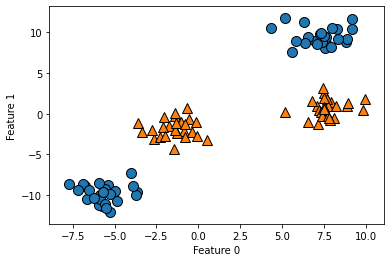

In [ ]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

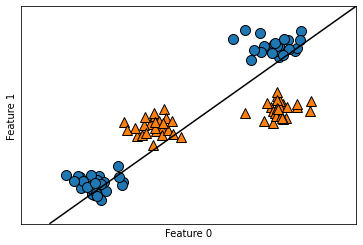

In [ ]:
from sklearn.svm import LinearSVC
# 직선으로만 데이터 포인트를 나눔(잘 들어맞지 않음)
linear_svm = LinearSVC(max_iter = 5000, tol = 1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

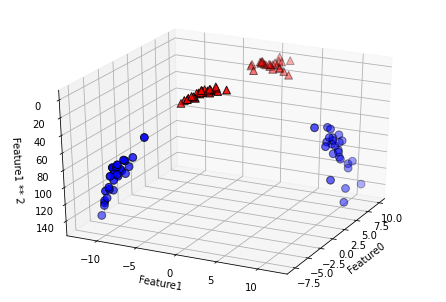

In [ ]:
import matplotlib
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
  ax = Axes3D(figure, elev = -152, azim = -26, auto_add_to_figure = False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev = -152, azim = -26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")
plt.show()

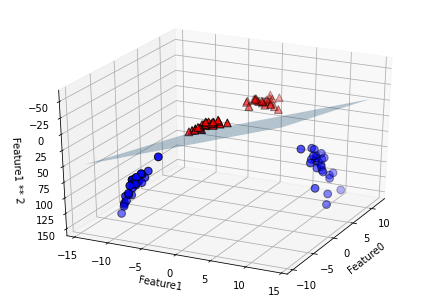

In [ ]:
linear_svm_3d = LinearSVC(max_iter = 5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
  ax = Axes3D(figure, elev = -152, azim = -26, auto_add_to_figure = False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")
plt.show()

**그래프 분석**

- 선형 SVM 모델은 선형이 아님

- 직선보다 타원에 가까움

Text(0, 0.5, 'Feature 1')

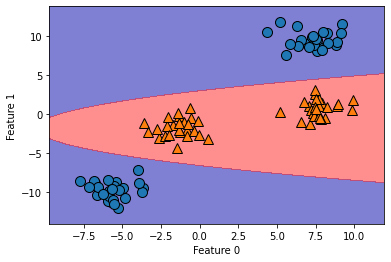

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 커널 기법

비선형 특성을 추가하여 강력한 선형 모델을 만드는 것의 문제점

- 어떤 특성을 추가해야 할지 모름

- 특성을 많이 추가하면 연산 비용이 커짐

**커널 기법(kernel trick)** : 새로운 특성을 많이 만들지 않고서 고차원에서 분류기를 학습시키는 방식

- 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라의 곱)를 계산

**데이터를 고차원 공간에 매핑하는 방법**

1) 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산

  - 특성1 ** 2 x 특성2 **5

2) 가우시안(Gaussian) 커널 : RBF(radial basis function)커널로 불림

  - 무한한 특성 공간에 매핑

  - 모든 차수의 모든 다항식을 고려함

#### SVM 이해하기

- SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 것이 중요

- 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 줌

       서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트

**새로운 데이터 포인트에 대해 예측**

1) 각 서포트의 거리를 측정

2) 분류 결정은 서포트 벡터까지의 거리에 기반

3) 서포트 벡터의 중요도는 훈련 과정에서 학습


**가우시안 커널 공식**


<img src = "https://s0.wp.com/latex.php?latex=k_%7Brbf%7D%28x_1%2C+x_2%29+%3D+exp%28-%5Cgamma%7C%7Cx_1+-+x_2%7C%7C%5E2%29&bg=ffffff&fg=444444&s=0&c=20201002&zoom=4.5" width = "400" >

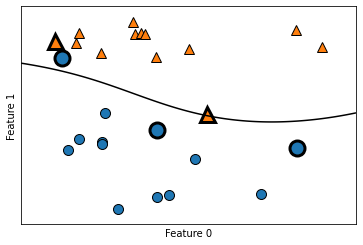

In [ ]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

**그래프 분석**

- 결정 경계는 검은 실선

- 서포트 벡터는 굵은 테두리로 표시

#### SVM 매개변수 튜닝

**매개변수**

1) gamma : 공식에 나와 있는 r로 커널 폭의 역수에 해당
  
  - 하나의 훈련 샘플이 미치는 영향의 범위를 결정

  - 작은 값은 넓은 영역을 의미하며 큰 값이면 영향이 미치는 범위가 제한적임.

  - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

2) C : 규제 매개변수

  - 각 포인트의 중요도를 제한

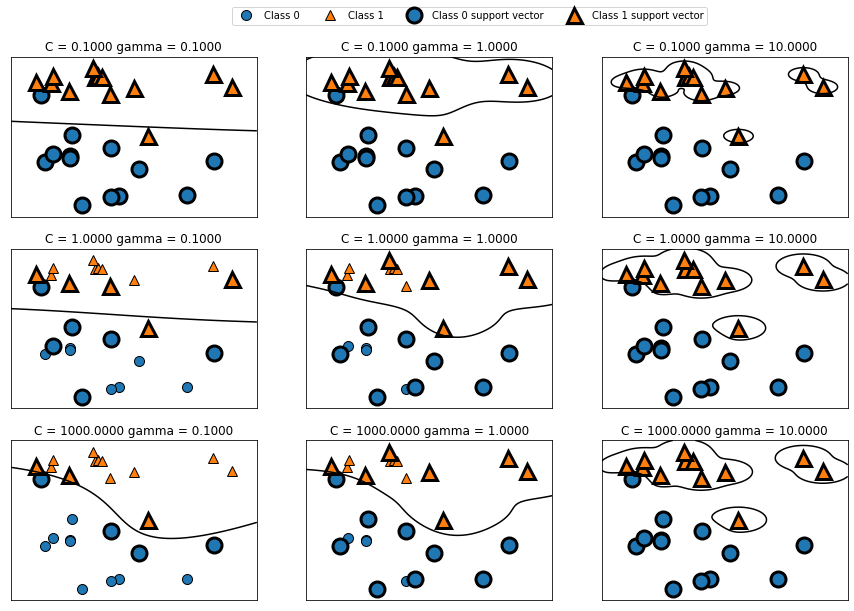

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0,0].legend(["Class 0", "Class 1", "Class 0 support vector", "Class 1 support vector"], ncol = 4, loc = (.9, 1.2))
plt.show()

**그래프 분석**

gamma 매개변수

- 작은 gamma 값은 가우시안 커널의 반경을 크게 함 &rarr; 많은 포인트들이 가까이 있는 것으로 고려됨

- 작을수록 결정 경계가 부드러우며 클수록 결정 경계가 포인트 하나에 더 민감해짐

- 작은 gamma 값이 결정 경계를 천천히 바뀌게 함 &rarr; 모델의 복잡도를 낮춤

- 큰 gamma 값 &rarr; 모델의 복잡도를 높임

C 매개변수

- 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작음

- C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류함

In [ ]:
# 기본값 C = 1, gamma = 1/n_features --> 과소적합
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print("Training set accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(svc.score(X_test, y_test)))

Training set accuracy: 0.90
Test set accuracy: 0.94


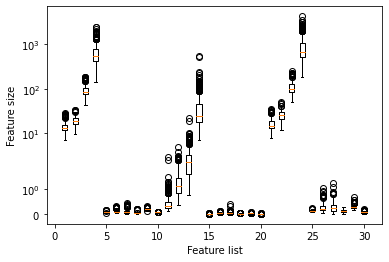

In [ ]:
plt.boxplot(X_train,manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")
plt.show()

**그래프 분석**

- 매개변수 설정과 데이터의 스케일에 민감함

- 특성의 범위가 다양

***해결방안 : 특성 값의 범위가 비슷해지도록 조정*** 

#### SVM을 위한 데이터 전처리

1) 모든 특성 값을 평균이 0이고 단위 분산이 되도록 조정

2) 0과 1 사이로 맞추는 방법을 많이 사용

3) 전처리 방법에 대한 선택은 데이터셋의 성질에 따라 설정

In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis = 0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)

# 훈련 데이터에 최솟값을 빼고 범우로 나누기
# 각 특성에 대한 최솟값은 0 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Feature minimum\n", X_train_scaled.min(axis = 0))
print("Feature Maximum\n", X_train_scaled.max(axis = 0))

Feature minimum
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature Maximum
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# 테스트 세트에도 같은 작업을 적용하지만 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Training set accuracy: 0.984
Test set accuracy: 0.972


In [ ]:
# C or gamma 증가하여 좀 더 복잡한 모델을 생성(C값 증가)
svc = SVC(C = 20)
svc.fit(X_train_scaled, y_train)
print("Training set accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Training set accuracy: 0.988
Test set accuracy: 0.979


#### 장단점과 매개변수

**장점**

- 다양한 데이터셋에서 잘 작동

- 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(특성이 적을 때와 많을 때)에 모두 잘 작동

- 10,000개의 샘플 정도에서는 잘 작동함

- 모든 특성이 비슷한 단위이고(ex. 모든 값이 픽셀의 컬러 강도) 스케일이 비슷할떄 사용

**단점**

- 샘플이 많을 때는 잘 맞지 않음

- 100,000개 이상의 데이터셋에는 속도와 메모리 문제가 있음

- 데이터 전처리와 매개변수 설정에 신경을 많이 써야함

  - 랜덤 포레스트나 그레이디언트 부스팅 같은 전처리가 거의 또는 전혀 필요 없는 트리 기반 모델을 많이 사용)

- 분석하기가 어려움

**매개변수**

- 규제 매개변수 C

- RBF 커널 매개변수
  - gamma 매개변수 : 가우시안 커널 폭의 역수

- gamma와 C 모두 모델의 복잡도를 조정

- gamma & C 이 큰 값 &rarr; 복잡한 모델을 만듦


### 2.3.9 신경망(딥러닝)

**다층 퍼셉트론(multilayer perceptrons, MLP)** : 딥러닝 알고리즘의 출발점이며 분류와 회귀에 사용, 피드포워드(feed-forward)신경망, 그냥 신경망이라 부름.


#### 신경망 모델

MLP는 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습

선형 회귀 모델의 예측 공식
```
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
```
ŷ : x[0]에서 x[p]까지의 입력 특성과 w[0]에서 w[p]까지 학습된 계수의 가중치 합



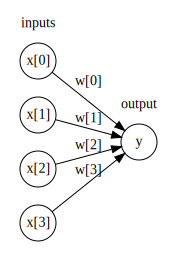

In [ ]:
mglearn.plots.plot_logistic_regression_graph()

왼쪽 노드 : 입력 특성을 나타냄

연결선 : 학습된 계수를 표현

오른쪽 노드 : 입력의 가중치 합(= 출력)


***MLP에서는 가중치 합을 만드는 과정을 반복***
```
1) 중간 단계를 구성하는 **은닉 유닛(hidden unit)**을 계산

2) 최종 결과를 위해 다시 가중치 합을 계산
```

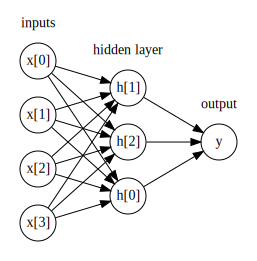

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph()

많은 계수(또는 가중치)를 학습할 필요가 있음

계수는 각 입력과 은닉층(hidden layer)의 은닉 유닛 가이, 그리고 각 은닉 유닛과 출력사이에 존재

```
1) 각 은닉 유닛의 가중치 합을 계산

2) 비선형 함수인 **렐루(rectified linear unit, ReLU)**나 **하이퍼볼릭 탄젠트(hyperbolic tangent, tanh)**를 적용

3) 함수의 결과의 가중치 합을 계산하여 출력 ŷ을 만듦
```


**렐루 함수** : 0이하를 잘라버림

**tanh 함수**: 낮은 입력값에 대해서는 -1로 수렴하고 큰 입력값에 대해서는 +1로 수렴

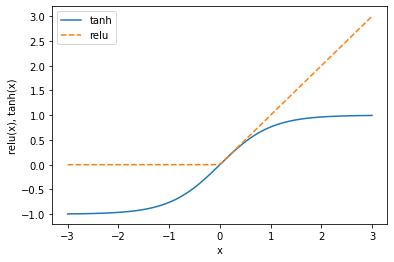

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = "tanh")
plt.plot(line, np.maximum(line, 0), linestyle = '--', label = "relu")
plt.legend(loc = "best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()

은닉층이 하나인 다층 퍼셉트론으로 (tahn 비선형 함수를 사용해서) 회귀 분석을 할 때 ŷ을 계산하기 위한 공식은 아래와 같다.

```
h[0] = tanh(w[0,0] * x[0] + w[1,0] * x[1] + w[2,0] * x[2] + w[3,0] * x[[3] + b[0])
h[1] = tanh(w[0,1] * x[0] + w[1,1] * x[1] + w[2,1] * x[2] + w[3,1] * x[[3] + b[1])
h[2] = tanh(w[0,2] * x[0] + w[1,2] * x[1] + w[2,2] * x[2] + w[3,2] * x[[3] + b[2])
ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b
```

w : 입력 x와 은닉층 h 사이의 가중치<br>

v : 은닉층 h와 출력 ŷ 사이의 가중치<br>

가중치(w, v)의 역할 : 훈련 데이터를 학습<br>

x : 입력 특성<br>

ŷ : 계산된 출력<br>

h : 중간 계산값<br>

**중요한 매개변수 : 은닉층의 유닛 개수**


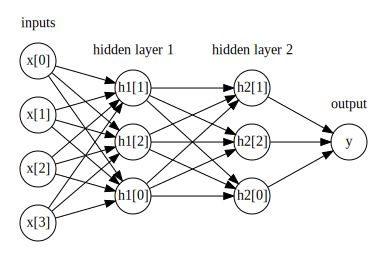

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

***&rarr; 많은 은닉층으로 구성된 대규모의 신경망이 생기면 이를 딥러닝이라고 부름***

#### 신경망 튜닝


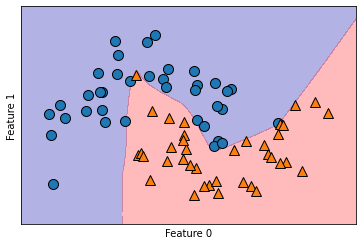

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
# 다층 퍼셉트론(MLP), 은닉 유닛 기본값 = 100
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

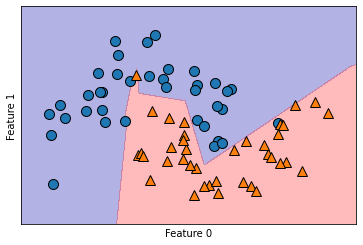

In [ ]:
# 은닉 유닛 = 10
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

**그래프 분석**

- 기본 비선형 함수 : 렐루

- 은닉 유닛 = 100 &rarr; 은닉 유닛 = 10 : 결정 경계가 날카로워짐

- 은닉층이 1개이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 만들어짐

- 매끄러운 결정 경계 만드는 방법
  
  - 은닉 유닛을 추가

  - 은닉층을 추가

  - tanh 함수를 사용






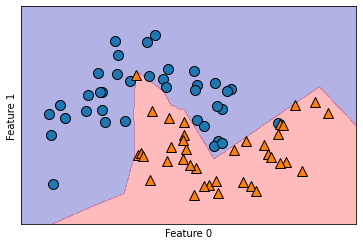

In [ ]:
# 10개의 유닛으로 된 두 개의 은닉층(은닉층 추가)
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

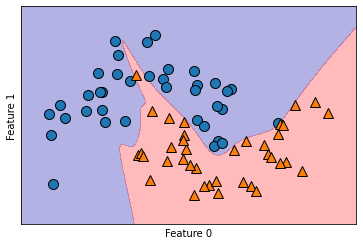

In [ ]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh', random_state = 0, hidden_layer_sizes = [10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

매개변수 alpha

- 모델의 복잡도를 제어

- 기본값은 매우 낮음(거의 규제 X)

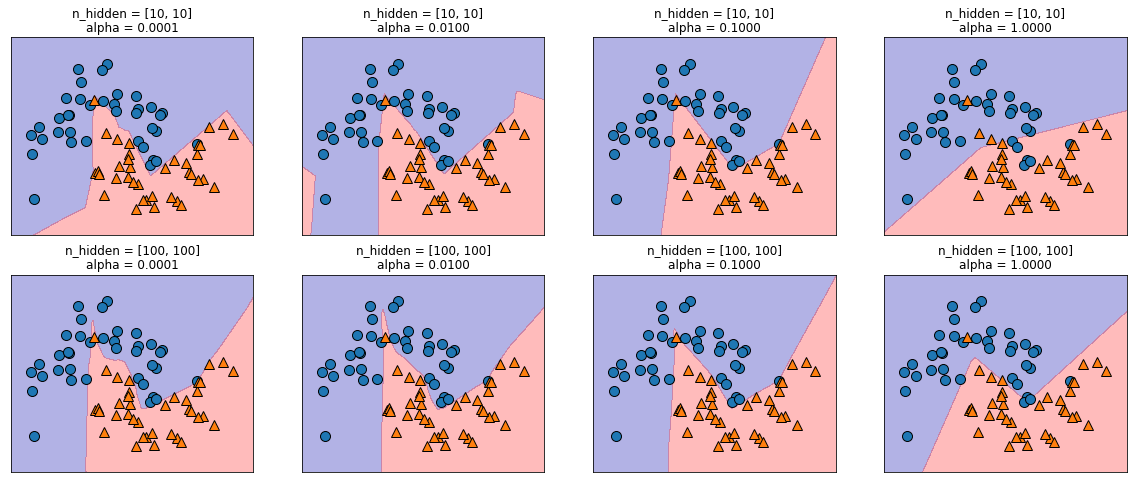

In [ ]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax,alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, max_iter = 1000, hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes], alpha = alpha)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
    ax.set_title("n_hidden = [{}, {}]\nalpha = {:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

**신경망의 복잡도를 제어하는 방법**

1) 은닉층의 수

2) 은닉층의 유닛 개수

3) 규제(alpha)를 사용

**주의할 점**

- 학습을 시작하기 전에 가중치를 무작위로 설정 &rarr; 무작위한 초기화가 모델의 학습에 영향을 줌

- 신경망이 크고 복잡도도 적절하면 영향이 적지만 그렇지 않은 경우(특히 작은 신경망일 경우)는 영향을 크게 받을 수 있음


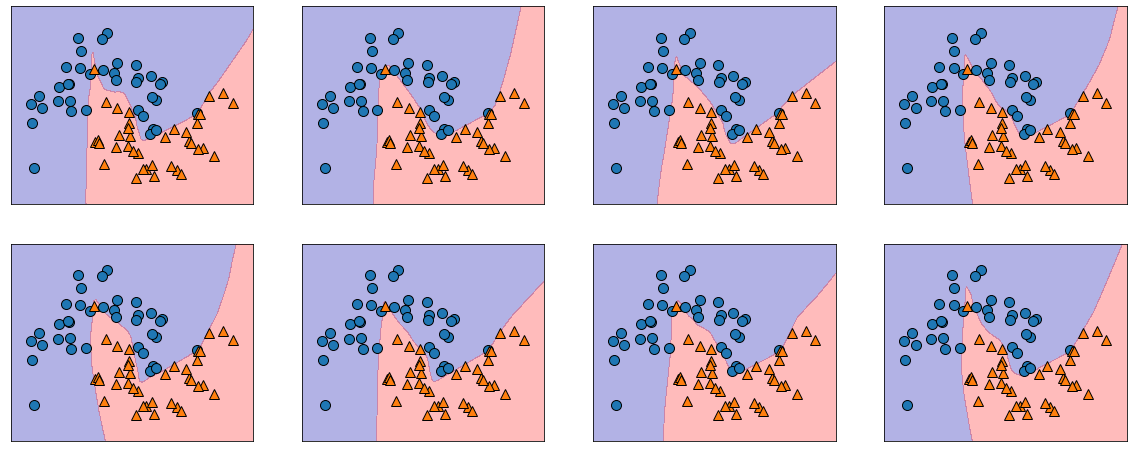

In [ ]:
# 같은 매개변수, 초기화가 다름
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for i, ax in enumerate(axes.ravel()):
  mlp = MLPClassifier(solver = 'lbfgs', random_state = i, hidden_layer_sizes = [100, 100])
  mlp.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3, ax = ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax= ax)

In [ ]:
print("유방암 데이터의 특성별 최댓값:\n", cancer.data.max(axis = 0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))

Training set accuracy: 0.94
Test set accuracy: 0.92


*정확도 높이는 방법 : 신경망에서는 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋음*

In [ ]:
# 훈련 세트 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis = 0)
# 훈련 세트 각 특성의 표준 편차를 계산
std_on_train = X_train.std(axis = 0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 평균 0, 표준 편차 1인 데이터로 변환
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 한다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Training set accuracy: 0.991
Test set accuracy: 0.965


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# 반복 횟수 늘려서 정확도 측정
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.972


In [ ]:
# 일반화 성능 향상시키기(복잡도 낮추기 -> alpha 값을 늘려 강하게 규제)
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Training set accuracy: 0.988
Test set accuracy: 0.972


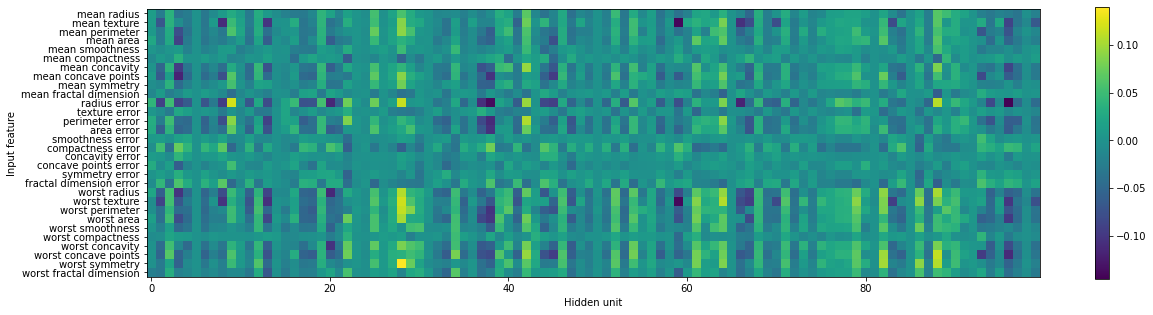

In [ ]:
# 학습된 가중치 시각화
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Hidden unit")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

**그래프 분석**

가중치가 작은 특성 : 덜 중요하다고 추론하거나 신경망에게 적절하게 입력되지 않을 수 있음


#### 장단점과 매개변수

**장점**

- 대량의 데이터에 내재된 정보를 잡아줌

- 매우 복잡한 모델을 만들 수 있음

- 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 머신러닝 알고리즘을 뛰어넘음

**단점**

- 종종 학습이 오래걸림(특히 크고 강력한 모델인 경우)

- 데이터 전처리에 주의해야함 &rrar; 동질의 데이터에서 잘 작동(다른 종류의 특성을 가진 데이터라면 트리 기반 모델이 더 잘 작동할 수 있음)

**매개변수**

- 은닉층의 유닛 수

- 은닉층의 개수

- alpha 매개변수 : 크기가 클수록 과대적합을 막기위한 규제가 심해짐

#### 신경망의 복잡도 추정

가장 중요한 매개변수는 은닉층의 개수와 은닉층의 유닛 수이다.

- 은닉층 : 처음엔 한 개 또느 두 개의 은닉층을 시작해서 늘려나가야 함

- 은닉층의 유닛 수 : 보통 입력 특성의 수와 비슷하게 설정(수천 초중반을 넘는 일은 거의 없음)

**복잡도 추정 방법**

1) 학습된 가중치

2) 계수의 수

**신경망의 매개변수 조정 방법**

1) 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만들기

2) 충분한 학습 후, 신경망의 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킴

*solver 매개변수*

-  모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘을 지정

- 기본값은 'adam'(대부분 잘 작동, 데이터의 스케일에 민감)

- 'lbfgs'는 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸림

- 'sgd'는 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있음


## 2.4 분류 예측의 불확실성 추정

*어떤 테스트 포인트에 대해 분류기가 예측한 클래스가 무엇인지 뿐만 아니라 정확한 클래스임을 얼마난 확신하는지가 중요*

**불확실성을 추정하는 함수**

1) decision_function

2) predict_proba

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,  y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

# 예제를 위해 클래스의 이름읠 'blue'와 'red'로 변경
y_named = np.array(['blue', 'red'])[y]

# 여러 개의 배열을 한꺼번에 train_test_split에 넣기(훈련 세트와 테스트 세트로 나뉘는 방식은 동일)
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state = 0)

# 그레이디언트 부스팅 모델 만들기
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 결정 함수

decision_function의 반환값의 크기는 n_samples이며 각 샘플이 하나의 실수 값을 반환한다.

In [ ]:
# 데이터 포인트가 양성 클래스인 클래스 1에 속한다고 믿는 정도
print("X_test.shape:", X_test.shape)
print("Decision_function result shape:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision_function result shape: (25,)


In [ ]:
# 결정 함수 결과 중 앞부분 일부를 확인(결정 함수의 부호만 보고 예측 결과를 알 수 있음)
print("Decision_function:\n", gbrt.decision_function(X_test)[:6])

Decision_function:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [ ]:
print("임계치와 결정 함수 결과 비교:\n", gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [ ]:
# 불리언 값을 0과 1로 변환
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교
print("pred는 예측 결과와 같다:", np.all(pred == gbrt.predict(X_test)))

pred는 예측 결과와 같다: True


In [ ]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값: {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69 최댓값: 4.29


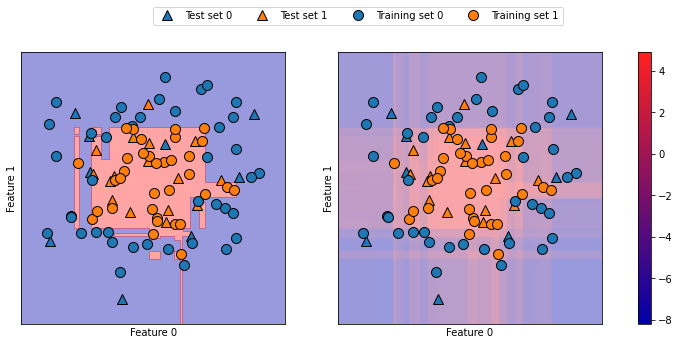

In [ ]:
# 훈련 데이터 : 원, 테스트 데이터 : 삼각형
# 왼쪽 : 결정 경계, 오른쪽 : 결정 함수
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .4, cm = mglearn.ReBl)

for ax in axes:
  # 훈련 포인트와 테스트 포인트를 그리기
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test set 0", "Test set 1", "Training set 0", "Training set 1"], ncol = 4, loc = (.1, 1.1))
plt.show()

**그래프 분석**

- 예측한 결과뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻음

- 결정 함수 그래프(오른쪽)에서 두 클래스 사이의 경계를 구분하기는 어려움

### 2.4.2 예측 확률

**predict_proba** : 각 클래스에 대한 확률

  - 이진 분류에서는 항상 (n_samples, 2)

In [ ]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


- 각 행의 첫 번째 원소 : 첫 번째 클래스의 예측 확률

- 각 행의 두 번째 원소 : 두 번째 클래스의 예측 확률

- 출력값은 항상 0과 1 사이의 값

- 두 클래스에 대한 확률의 합 : 항상 1

In [ ]:
# predict_proba 결과 중 앞부분 일부 확인
print("예측 확률:\n", gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


**예측 확률에 대한 분석**

- 데이터에 있는 불확실성이 얼마나 이 값에 잘 반영되는지는 모델과 매개변수 설정에 달려있음

- 과대적합된 모델 또는 잘못된 예측이더라도 예측의 확신이 강함

- 복잡도가 낮은 모델은 예측에 불확실성이 높게 나옴

- 불확실성 = 정확도 &rarr; 모델이 *보정* 되었다고 말함

**&rarr; 보정된 모델에서 70% 확신을 가진 예측은 70%의 정확도를 냄**
  

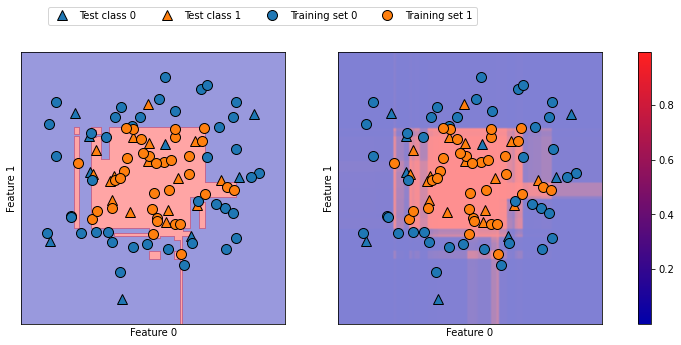

In [ ]:
# 왼쪽 : 결정 경계, 오른쪽 : 예측 확률
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1], alpha = .5, cm = mglearn.ReBl, function = 'predict_proba')
for ax in axes:
  # 훈련 포인트와 테스트 포인트 그리기
  mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
  mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = 'o', ax = ax)
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax = axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Training set 0", "Training set 1"], ncol = 4, loc = (.1, 1.1))
plt.show()

**그래프 분석**

- 예측 확률(우) 그래프의 경계가 더 명확해 불확실성이 있는 작은 영역들도 확인 가능

### 2.4.3 다중 분류에서의 불확실성

In [ ]:
from sklearn.datasets import load_iris
# 클래스가 3개
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [ ]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6,:])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


**In 다중 분류**

- decision_function의 결괏값의 크기 : (n_samples, n_classes)

- 각 열은 각 클래스에 대한 확신 점수를 저장

- 수치&uarr; &rarr; 그 클래스가 맞을 확률&uarr;

- 수치&darr; &rarr; 그 클래스가 맞을 확률&darr;

- 데이터 포인트마다 점수들에서 가장 큰 값을 찾아 예측 결과를 재현

In [ ]:
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test), axis = 1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률의 합 : 1
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis = 1))

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [ ]:
print("가장 큰 예측 확률의 인덱스:\n", np.argmax(gbrt.predict_proba(X_test), axis = 1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


**주의할 점**

- 열이 n_classes개일 때는 열을 가로질러서 argmax 함수를 적용해 예측 결과를 재현가능

- 클래스각 문자열이거나 또는 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있음

- predict의 결과와 decision_function이나 predict_proba의 결과를 비교하려면 분류기의 classes_속성을 사용해 클래스의 실제 이름을 얻어야 함

In [ ]:
logreg = LogisticRegression(max_iter = 1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_에 연결:", logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 요약 및 정리

과소적합 : 훈련 데이터의 다양한 특징을 반영하지 못하는 모델을 의미

과대 적합 : 훈련 데이터에 너무 맞춰져 있어서 새로운 데이터에 일반적이지 못한 모델을 의미

**분류와 회귀에 사용할 수 있는 머신러닝**

- 최근접 이웃 : 작은 데이터셋일 경우, 기본 모델로서 좋고 설명이 쉬움

- 선형 모델 : 첫 번째로 시도할 알고리즘, 대용량 데이터셋 가능, 고차원 데이터에 가능

- 나이브 베이즈 : 분류만 가능, 선형 모델보다 훨씬 빠름, 대용량 & 고차원 데이터에 가능, 선형 모델보다 덜 정확함.

- 결정 트리 : 매우 빠름, 데이터 스케일 조정 필요 X, 시각화하기 좋고 설명이 쉬움

- 랜텀 포레스트 : 결정 트리 하나보다 거의 항상 좋은 성능을 냄, 매우 안정적이고 강력함, 데이터 스케일 조정 필요 X, 고차원 희소 데이터에는 잘 안 맞음.

- 그레이디언트 부스팅 결정 트리 : 랜덤 포레스트보다 조금 더 성능이 좋음. 랜덤 포레스트보다 학습은 느리나 예측은 빠르고 메모리를 조금 사용, 랜덤 포레스트보다 매개변수 튜닝이 많이 필요함

- 서포트 벡터 머신 : 비슷한 의미의 특성으로 이뤄진 중간 규모 데이터셋에 잘 맞음, 데이터 스케일 조정 필요, 매개변수에 민감

- 신경망 : 특별히 대용량 데이터셋에서 매우 복잡한 모델을 만들 수 있음, 매개변수 선택과 데이터 스케일에 민감, 큰 모델은 학습이 오래 걸림

**분석 순서**

1) 선형 모델이나 나이브 베이즈 또는 최근접 이웃 분류기 같은 간단한 모델로 시작

2) 랜덤 포레스트나 그레이디언트 부스팅 결정 트리, SVM, 신경망 같은 복잡한 모델로 분석